## Proyecto Integrador M4

In [2]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Avance 1

##### Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.  

In [2]:
# Path to CSV file

#data = pd.read_csv(r"C:\\Users\\danip\\Downloads\\BIOGENESYS\\Dataset\\data_latinoamerica.csv", sep=',')
data = pd.read_csv("C:/Users/danip/Downloads/BIOGENESYS/Dataset/data_latinoamerica.csv", sep=',')



In [3]:
# Show first rows of DataFrame to verify its content

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

##### Prueba que el dataset cargado tiene la cantidad de registros y columnas especificadas 

In [4]:
# Check the shape of the dataset
num_records, num_columns = data.shape

print(f"The dataset has {num_records} records and {num_columns} columns.")

The dataset has 12216057 records and 50 columns.


In [5]:
np.shape(data)

(12216057, 50)

##### Selección de países donde se expandirá BIOGENESYS: Colombia, Argentina, Chile, México, Perú y Brasil.


In [6]:
# data ['country_name'].value_counts()

data ['country_name'].value_counts()

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Venezuela               24775
Ecuador                 24775
Guatemala               22793
Uruguay                 19820
Honduras                18829
Paraguay                18829
Nicaragua               17838
Cuba                    17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

In [7]:
selected_countries = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_latam = data[data['country_name'].isin(selected_countries)]

In [8]:
np.shape(data_latam)

(11970289, 50)

##### Comparación a nivel de país para revisar datos nulos o vacios


In [9]:
data_latam.isnull().sum()[data_latam.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [10]:
data_latam.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

##### Location_key for latam countries only [AR, CL, CO, MX, PE, BR]

In [11]:
data_latam_countries = data_latam[data_latam['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

data_latam_countries.shape

(5946, 50)

##### Filtro de datos en fechas mayores a 2021-01-01.


In [12]:
# Filter the dataset for records with dates after than 2021-01-01
data_latam_countries_date = data_latam_countries[data_latam_countries['date'] > '2021-01-01']

In [13]:
data_latam_countries_date.shape

(3744, 50)

##### Comparación a nivel de país para llenar valores faltantes del nuevo filtro data_latam_countries_date.


In [14]:
null_values_date = data_latam_countries_date.isnull().sum()[data_latam_countries_date.isnull().sum() > 0]
print(null_values_date)
print(np.shape(data_latam_countries_date))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [15]:
null_values_date.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [16]:
# Average of New_confirmed
data_latam_countries_date.new_confirmed.mean()

np.float64(13936.279613215149)

In [17]:
# Colombia Comparison
data_latam_countries_date.loc[data_latam_countries_date['country_name'] == 'Colombia','new_confirmed'].mean()

np.float64(7407.414516129033)

##### Limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde es necesario, se trata con valores medios, valores anteriores y/o valores siguientes.

In [18]:
for country in selected_countries:
    print(country)        

Argentina
Chile
Colombia
Mexico
Peru
Brazil


In [19]:
# Use a For cycle to imput missing values in each latam country

for country in selected_countries:
    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'new_confirmed'
    ] = data_latam_countries_date['new_confirmed'].fillna(round(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'new_confirmed'
        ].mean()))
    
    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'new_deceased'
    ] = data_latam_countries_date['new_deceased'].fillna(round(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'new_deceased'
        ].mean()))
    
    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_confirmed'
    ] = data_latam_countries_date['cumulative_confirmed'].fillna(round(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_confirmed'
        ].mean()))

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_deceased'
    ] = data_latam_countries_date['cumulative_deceased'].fillna(round(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_deceased'
        ].mean()))
    
    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_vaccine_doses_administered'
    ] = data_latam_countries_date['cumulative_vaccine_doses_administered'].fillna(round(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_vaccine_doses_administered'
        ].mean()))

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'average_temperature_celsius'
    ] = data_latam_countries_date['average_temperature_celsius'].fillna(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'average_temperature_celsius'
        ].mean())

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'minimum_temperature_celsius'
    ] = data_latam_countries_date['minimum_temperature_celsius'].fillna(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'minimum_temperature_celsius'
        ].mean())            

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'maximum_temperature_celsius'
    ] = data_latam_countries_date['maximum_temperature_celsius'].fillna(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'maximum_temperature_celsius'
        ].mean())

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'rainfall_mm'
    ] = data_latam_countries_date['rainfall_mm'].fillna(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'rainfall_mm'
        ].mean())
    
    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'relative_humidity'
    ] = data_latam_countries_date['relative_humidity'].fillna(data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'relative_humidity'
        ].mean())

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'new_recovered'
    ] = data_latam_countries_date['new_recovered'].fillna(0)

    data_latam_countries_date.loc[
        data_latam_countries_date['country_name'] == country,'cumulative_recovered'
    ] = data_latam_countries_date['cumulative_recovered'].fillna(0)

##### Optimized

##### Características básicas del dataset con la distribución de las variables clave como incidencia de COVID-19 y las variables claves para análisis.

In [16]:
# Define the columns that need to be filled with the country-specific mean
#mean_fill_columns = [
#    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
#    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
#    'relative_humidity', 'rainfall_mm'
#]

# Group the dataframe by 'location_key' and apply fillna() with the mean of each country
#data_latam_countries_date.loc[:, mean_fill_columns] = data_latam_countries_date.groupby('location_key')[mean_fill_columns].transform(lambda x: x.fillna(x.mean()))

# Fill the following columns with 0 for missing values (within the selected countries)
#zero_fill_columns = ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']

#data_latam_countries_date.loc[:, zero_fill_columns] = data_latam_countries_date[zero_fill_columns].fillna(0)

In [20]:
null_values_date = data_latam_countries_date.isnull().sum()[data_latam_countries_date.isnull().sum() > 0]
print(null_values_date)
print(np.shape(data_latam_countries_date))

Series([], dtype: int64)
(3744, 50)


In [21]:
null_values_date

Series([], dtype: int64)

##### Guardado de los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [22]:
data_latam_countries_date.to_csv('DatosFinalesFiltrado.csv', index=False)

#### Reinicio de Notebook Para Liberar Memoria y Continuar con Análisis

In [23]:
data_latam_countries_date = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

##### Bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default

In [24]:
for i in data_latam_countries_date.columns:
    print(i)
    print(data_latam_countries_date[i].describe())
    print('\n')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object


date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object


country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object


country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object


new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64


new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64


cumulative_confirmed
count    3.744000e+03
mean     6.777074e+06
std      

###### New recovered y New Confirmed tenían valores negativos, se corrigieron del archivo

In [25]:
# with while loop

i = 0

while i < len(data_latam_countries_date.columns):
    print(data_latam_countries_date.columns[i])
    print(data_latam_countries_date[data_latam_countries_date.columns[i]].describe())
    print('\n')
    
    i += 1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object


date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object


country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object


country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object


new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64


new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64


cumulative_confirmed
count    3.744000e+03
mean     6.777074e+06
std      

#####  Función que permite obtener descriptivos faltantes la mediana, varianza, rango y moda.


In [26]:
def describe_data(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print(i)
            print('Mediana',data[i].median())
            print('Varianza',data[i].var())
            print('Rango',data[i].max() - data[i].min())
            print('Moda',data[i].mode())
            print('\n')

describe_data(data_latam_countries_date) #selected_countries)

new_confirmed
Mediana 5214.0
Varianza 586577491.1622744
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64


new_deceased
Mediana 100.5
Varianza 257292.47863447666
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64


cumulative_confirmed
Mediana 3632143.5
Varianza 63828420111296.516
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64


cumulative_deceased
Mediana 139614.0
Varianza 33415398047.038906
Rango 685202.0
Moda 0     128994.0
1     129016.0
2     129070

### Avance 2

In [3]:
# DataFrame Clean Data Load

data_latam_countries_date = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

#### Análisis Estadístico con Pandas y Numpy: Propiedades estadísticas del dataset. Medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio.

In [4]:
for i in data_latam_countries_date.columns:
    print(i)
    print(data_latam_countries_date[i].describe())
    print('\n')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object


date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object


country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object


country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object


new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64


new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64


cumulative_confirmed
count    3.744000e+03
mean     6.777074e+06
std      

In [30]:
selected_countries = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

#### 'Date' as Index


In [31]:

# Set 'date' as the index
data_latam_countries_date['date'] = pd.to_datetime(data_latam_countries_date['date'])
data_latam_countries_date.set_index('date', inplace=True)

# Display the filtered data
print(data_latam_countries_date.head())

           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_va

#### Matriz de Correlación Para Análisis

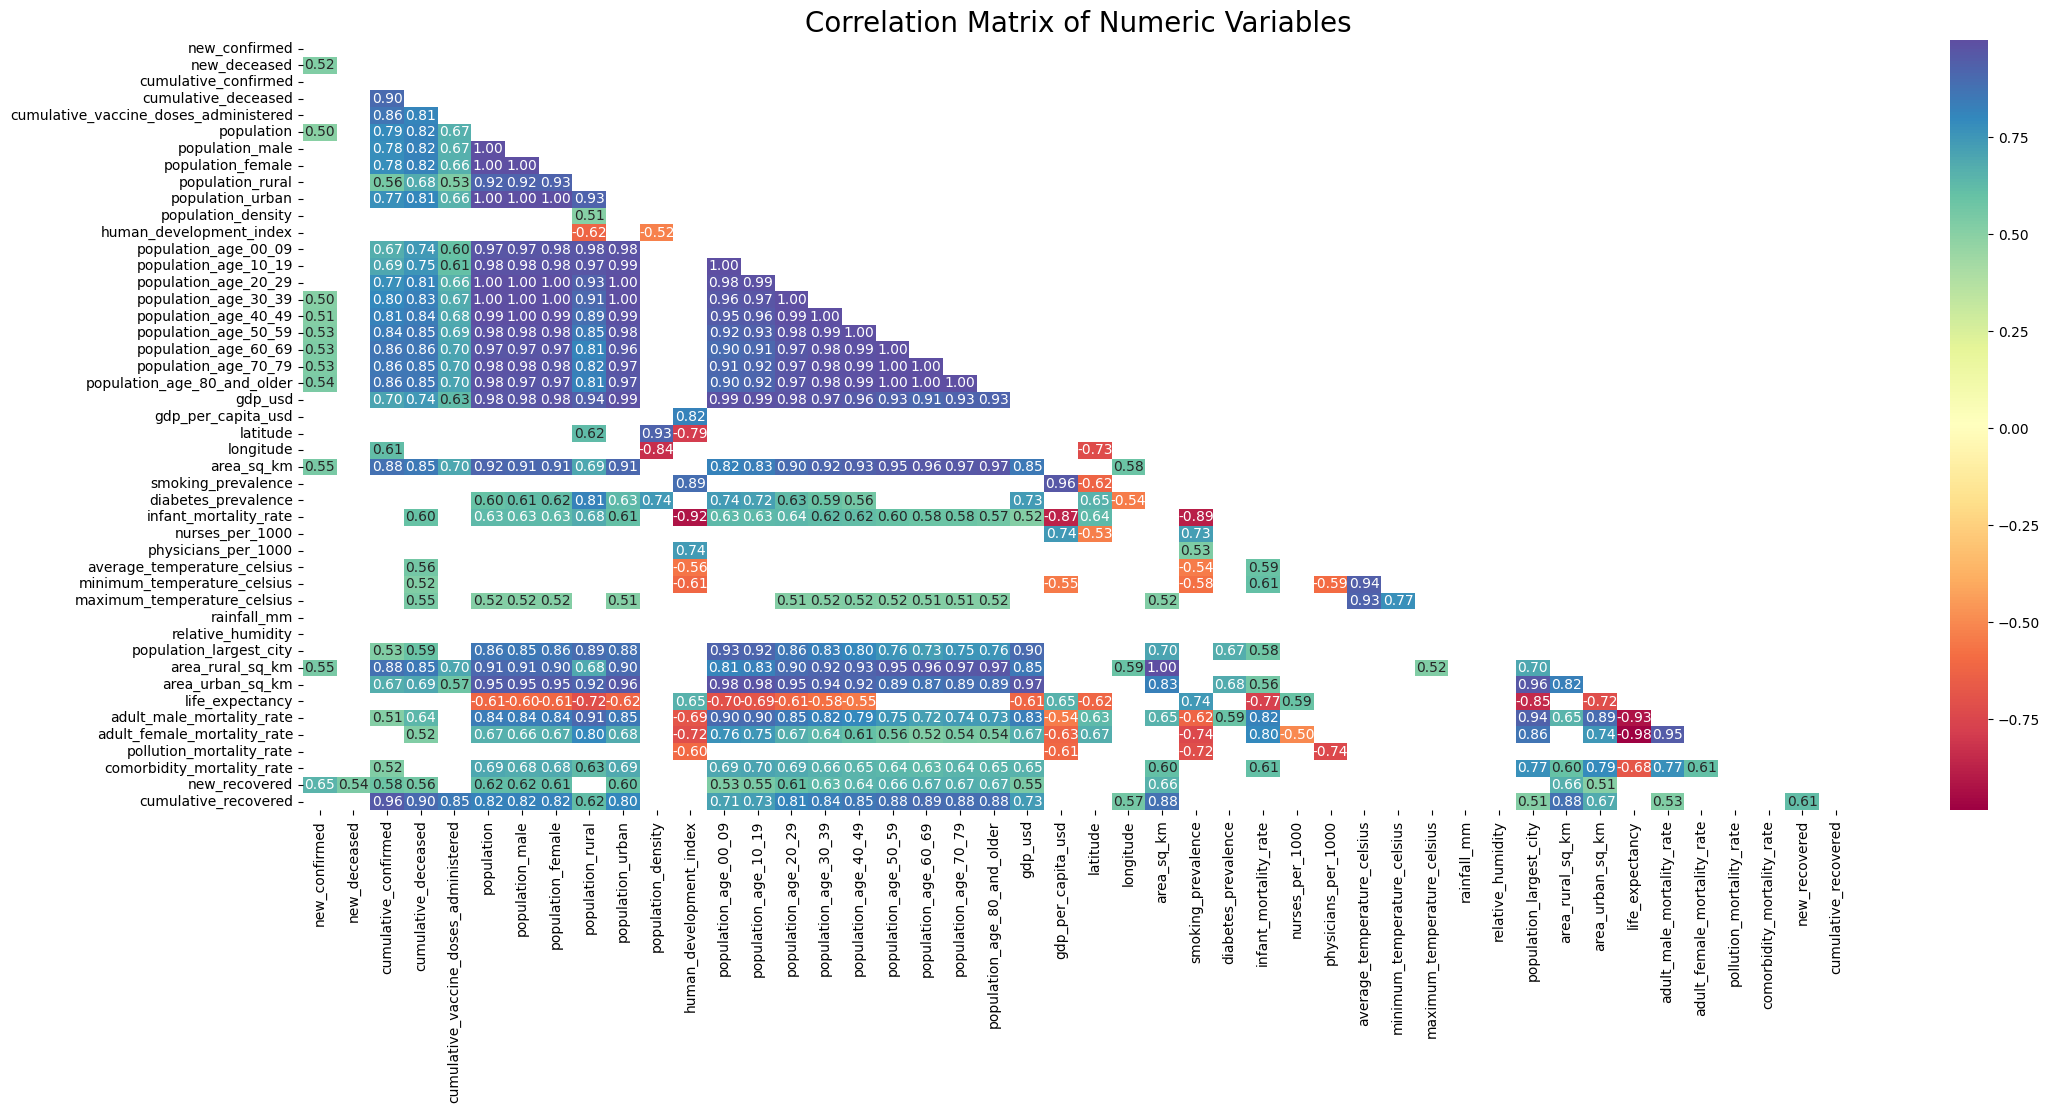

In [61]:
# Matrix correlation of numeric variables
numeric_columns = data_latam_countries_date.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latam_countries_date[numeric_columns].corr()

# Mask creation for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# We'll show values greater than 0.5 where correlation is strong, however, there will be negative values
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Create the heatmap
plt.figure(figsize=(25,10))
hetmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Spectral', mask=mask)
hetmap.set_title('Correlation Matrix of Numeric Variables', fontsize=20)
hetmap.tick_params(labelsize=10)

plt.show()

##### Grafico de variables con mayo correlación, umbral absoluto definido de 0.5. funciona para análisis posterior y toma de decisiones

In [ ]:
# #Diccionario de colores para cada país
# colores = {
#     "Argentina": "blue",
#     "Chile": "green",
#     "Colombia": "red",
#     "Mexico": "purple",
#     "Peru": "brown",
#     "Brazil": "orange"
# }

# fig, ax = plt.subplots(figsize=(10, 6))  # Crear la figura, para colocar el gráfico

# paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

# for pais in paises_seleccionados:
#     datos_pais = datos_finales[datos_finales["country_name"] == pais]
#     datos_pais.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot(
#         ax=ax, label=pais, color=colores[pais]
#     )

# plt.title("cumulative_vaccine_doses_administered por mes de todos los países")
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.show()


# #se crea dataframe con columnas mayores a 6 porque son las que tienen valores  diferentes de cada pais:
# columnas_mayores_6=[]
# for i in datos_finales.columns:
#     if i not in ["location_key", "date", "country_code", "latitude", "longitude"]:
#         if datos_finales[i].nunique()>6:
#             columnas_mayores_6.append(i)

# #agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por pais:
# columnas_mayores_6.append("country_name")

# #se crea un dataframe con las columnas mayores a 6:
# datos_finales_columnas_mayores_6=datos_finales[columnas_mayores_6]

# #violinplot en todos los paises para variables numericas:
# for i in datos_finales_columnas_mayores_6.columns:
#     if i not in ["location_key", "date", "country_code", "latitude", "longitude" , "country_name"]:
#         fig, ax=plt.subplots(figsize=(10,6))
#         sns.violinplot(x="country_name", y=i, data=datos_finales_columnas_mayores_6, hue="country_name")
#         plt.title(f"{i} por pais")
#         plt.show

#### Revisión gráfica de las columnas utilizando barplots en un ciclo 'For'

C:\Users\danip\AppData\Local\Temp\ipykernel_13316\2388082932.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 3))


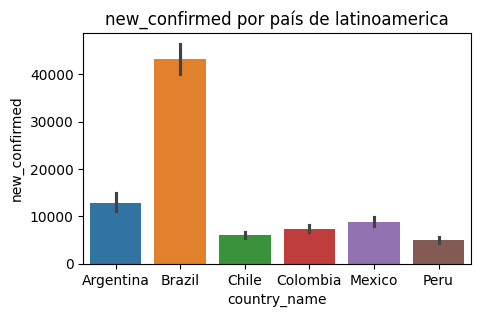

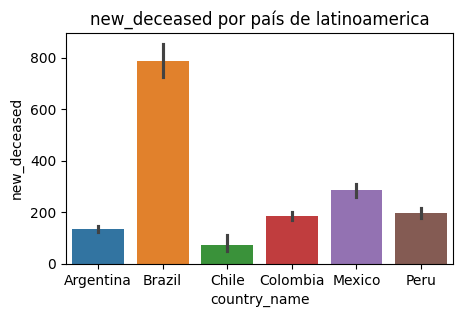

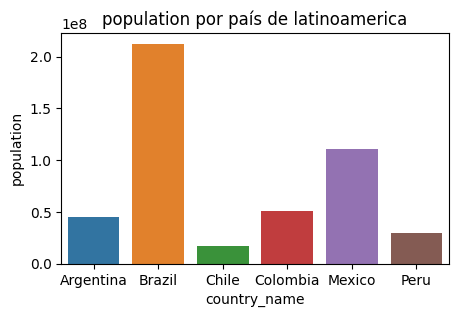

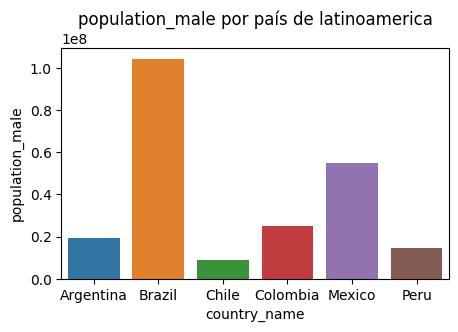

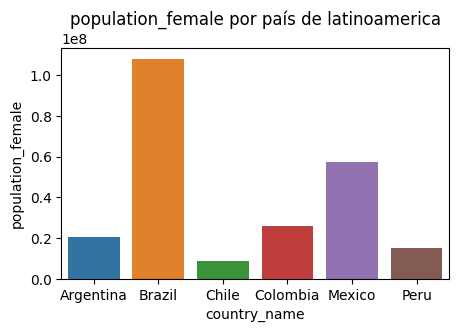

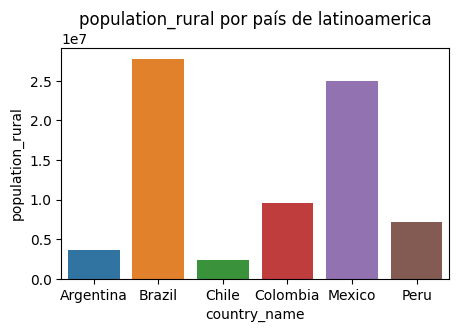

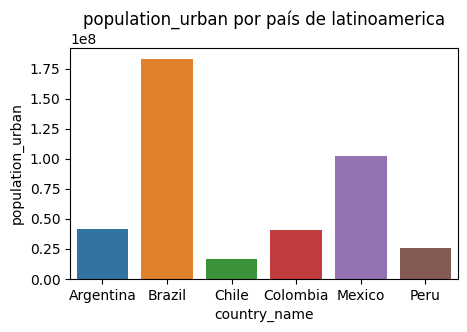

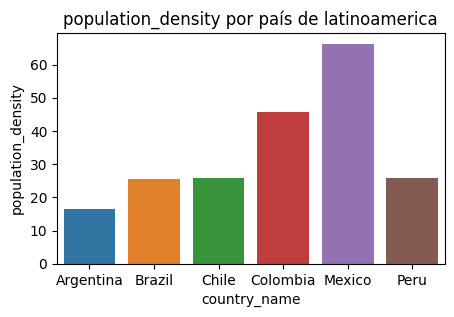

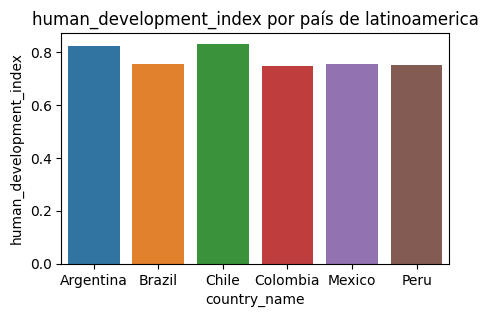

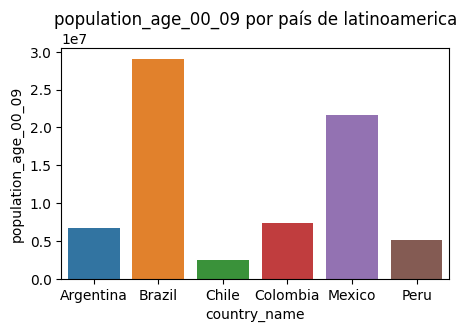

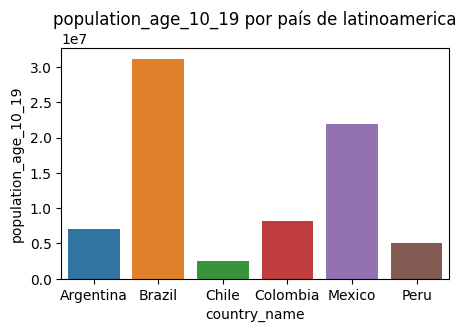

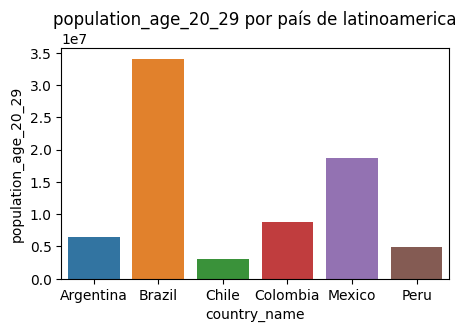

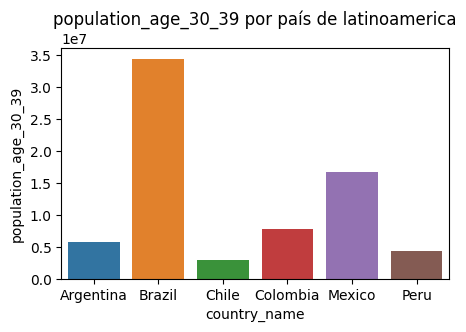

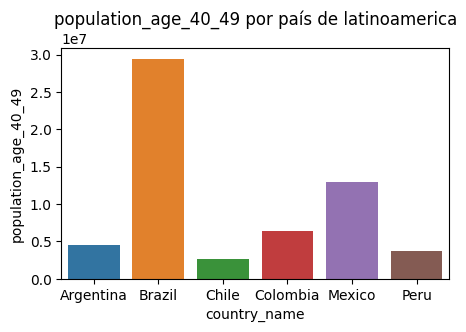

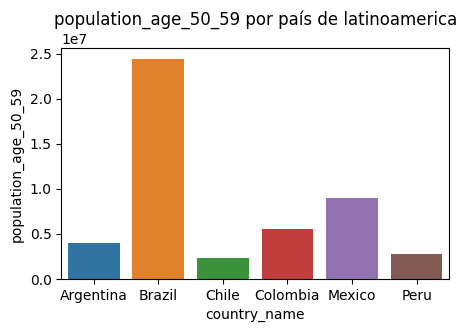

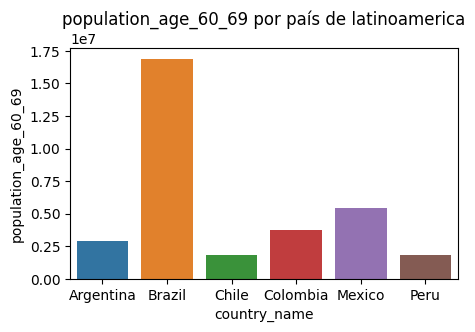

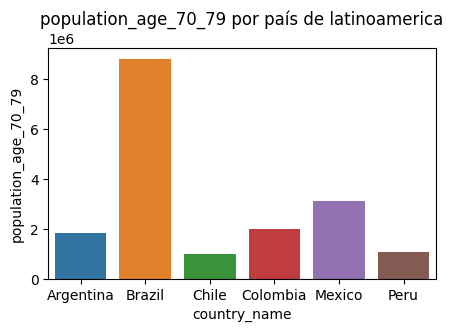

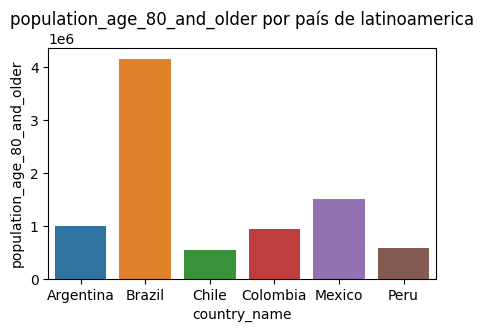

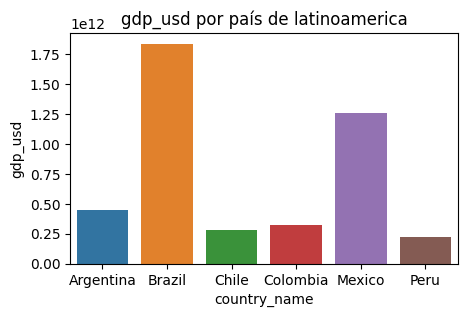

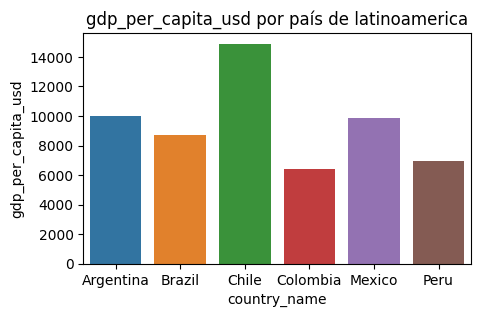

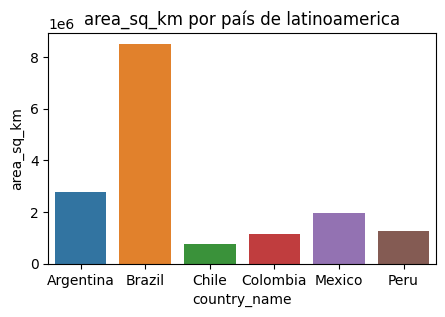

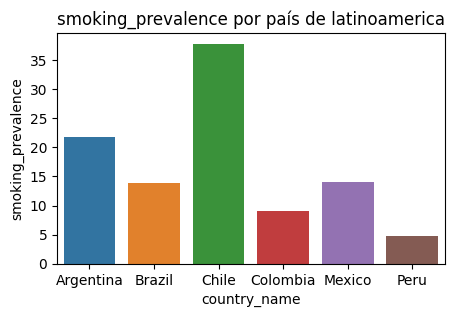

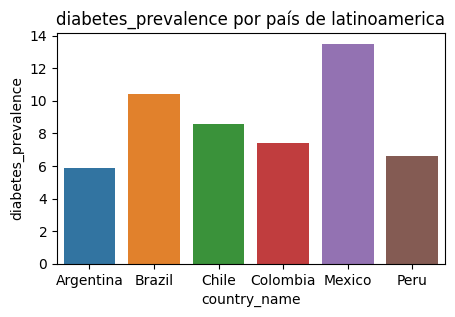

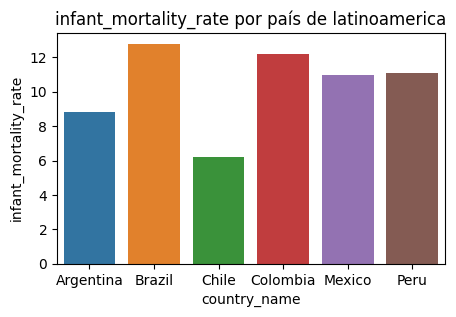

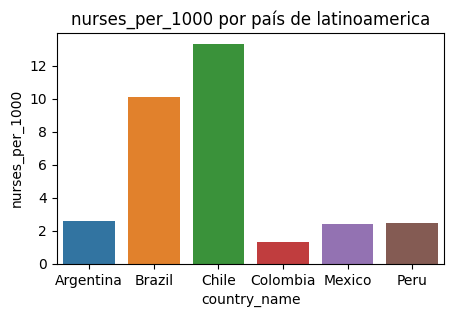

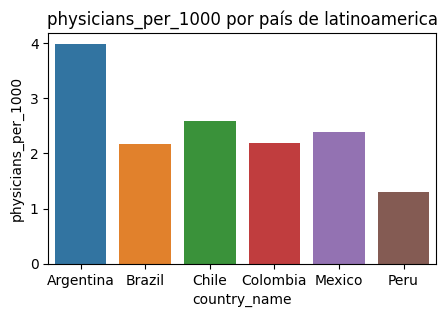

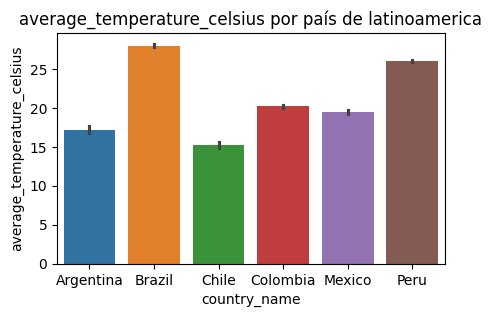

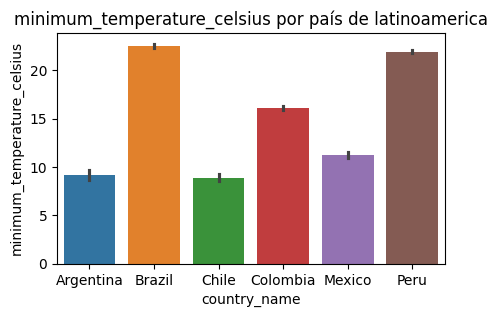

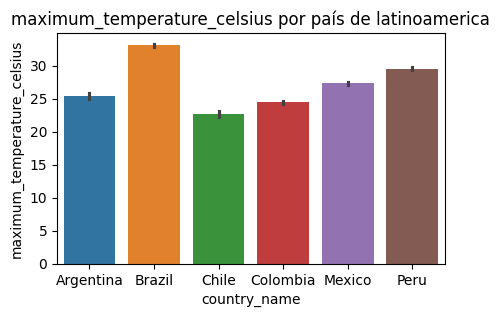

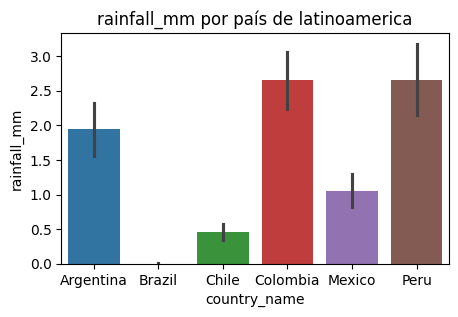

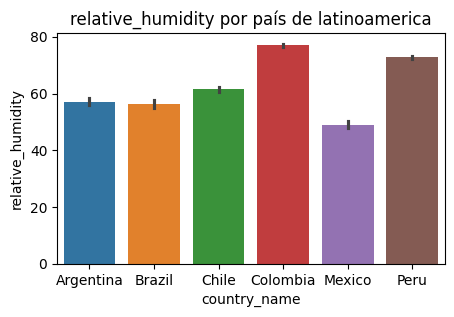

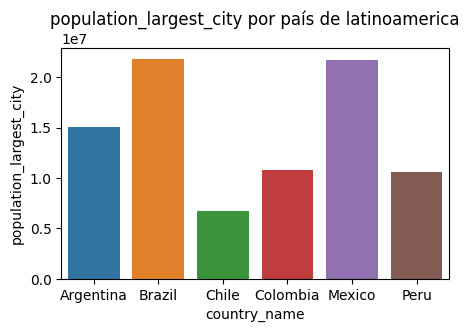

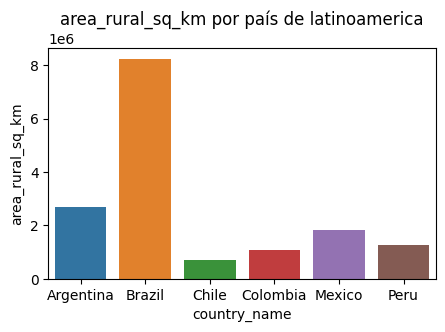

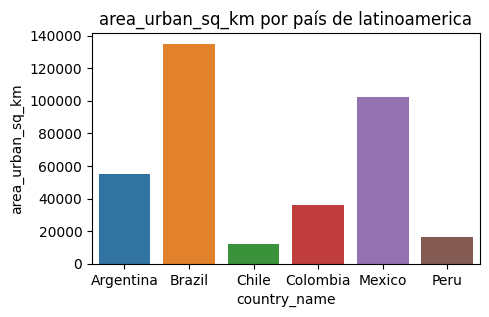

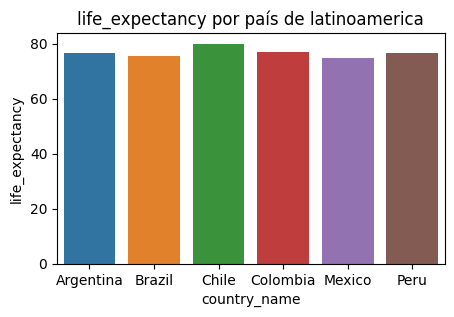

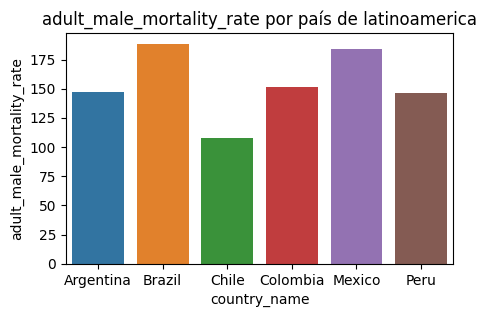

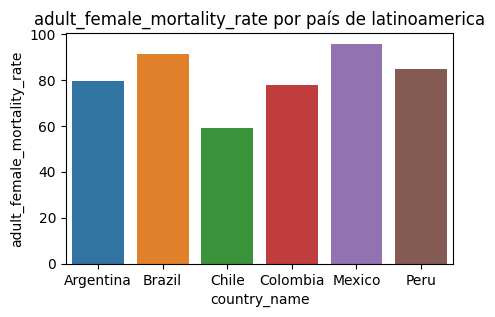

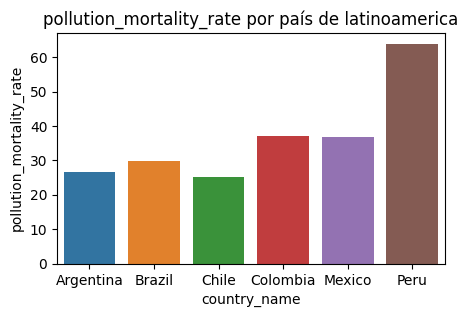

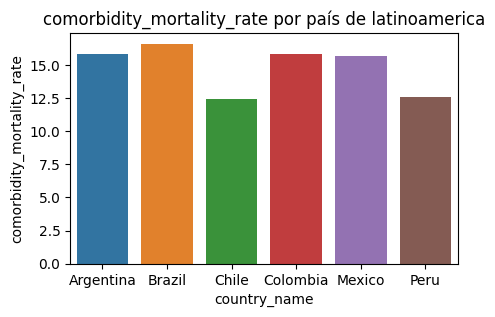

In [45]:
# Bar Plot diagrams for every LATAM counntry with 6 columns

for i in data_latam_countries_date.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name','latitude','longitude', 'cumulative_confirmed', 'cumulative_deceased', 
                 'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latam_countries_date, ax=ax, hue='country_name')
        plt.title(f'{i} por país de latinoamerica')
        plt.show
        

#### Histogramas de las variables que “Sí” tenga cambios de valores.


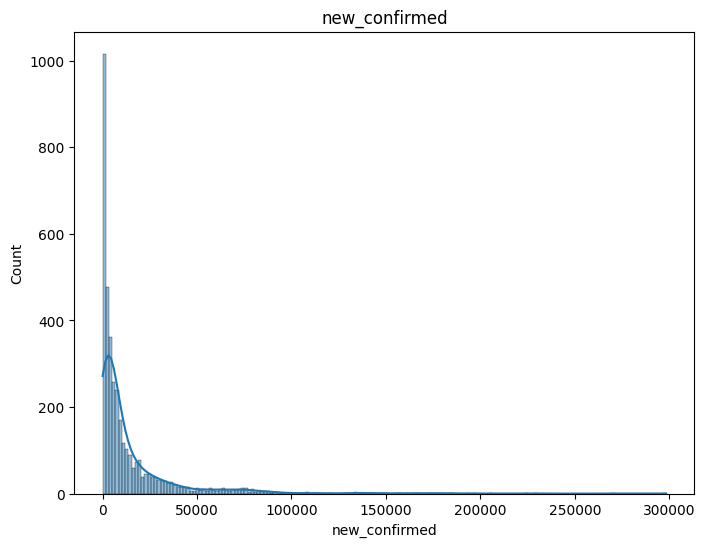

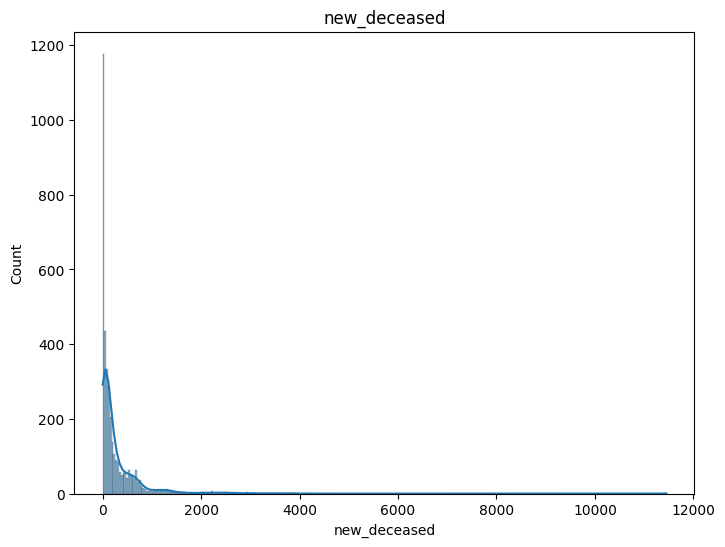

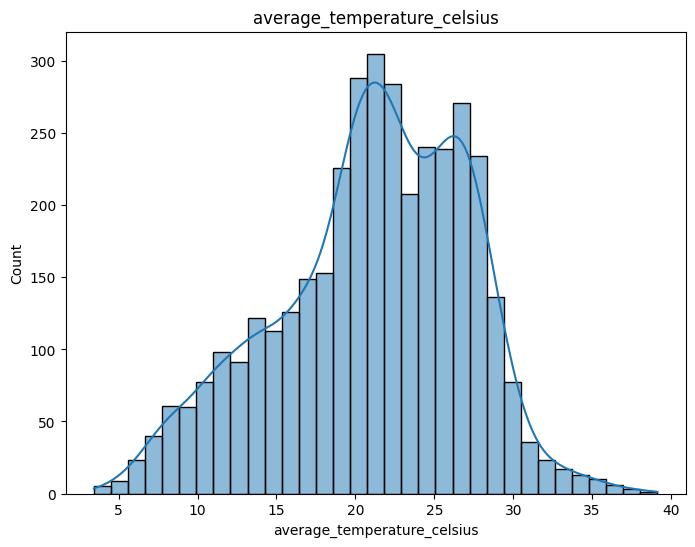

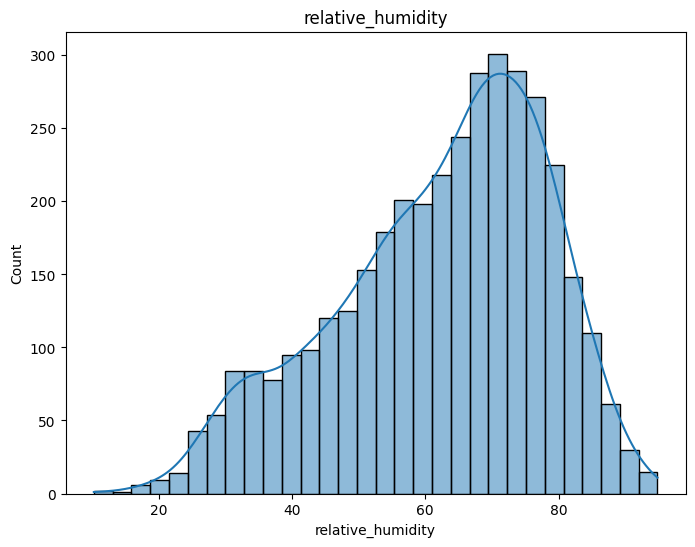

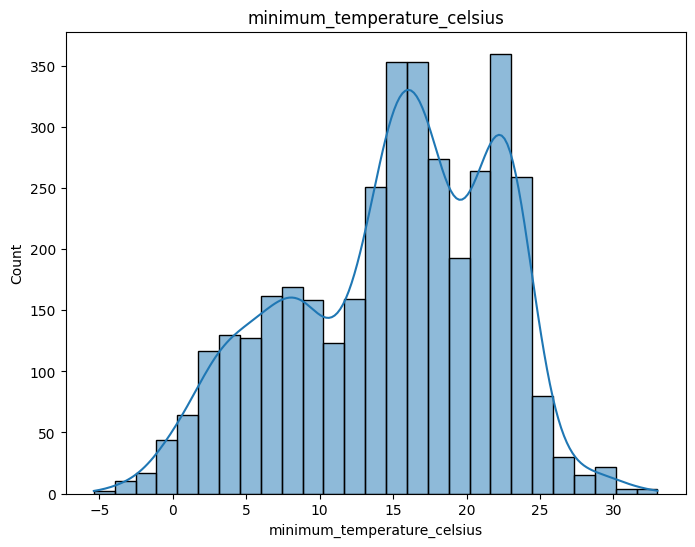

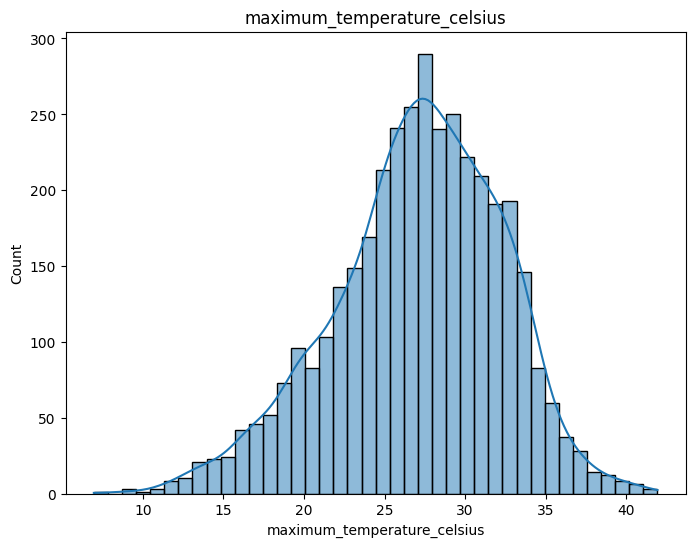

In [52]:
columns_list_6 = ['new_confirmed', 'new_deceased', 'average_temperature_celsius', 'relative_humidity', 
                  'minimum_temperature_celsius', 'maximum_temperature_celsius']
# Create histograms of numeric variables
for i in data_latam_countries_date[columns_list_6]:
    if i not in ['location_key', 'date', 'country_code', 'country_name','latitude','longitude', 'cumulative_confirmed', 'cumulative_deceased', 
                 'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_latam_countries_date[i], kde=True,)
        plt.title(f'{i}')
        plt.show

#### Diagrama de dispersión de la temperatura media contra los casos confirmados.


<function matplotlib.pyplot.show(close=None, block=None)>

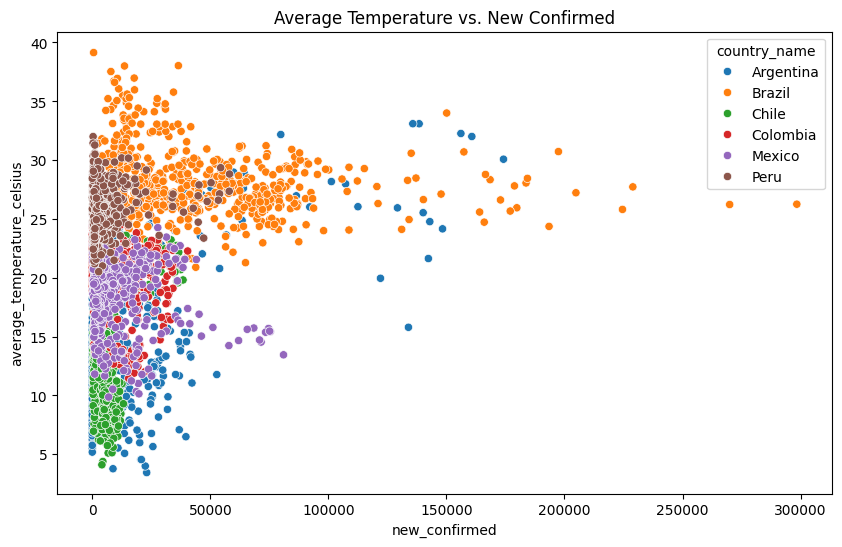

In [62]:
# Scatterplot diagram of average_temperature_celsius vs. new_confirmed

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='new_confirmed', y='average_temperature_celsius', data=data_latam_countries_date, hue='country_name')
plt.title('Average Temperature vs. New Confirmed')
plt.show

#### Diagrama de dispersión de la temperatura media contra las muertes confirmadas.


<function matplotlib.pyplot.show(close=None, block=None)>

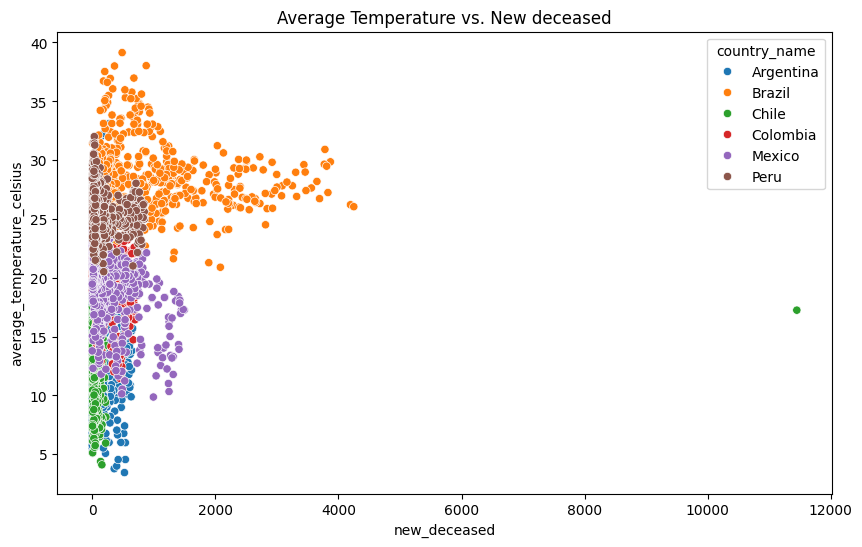

In [63]:
# Scatterplot diagram of average_temperature_celsius vs. new_deceased

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='new_deceased', y='average_temperature_celsius', data=data_latam_countries_date, hue='country_name')
plt.title('Average Temperature vs. New deceased')
plt.show

#### Comportamiento de las dosis administradas por mes en todos los países (Valor medio).


<function matplotlib.pyplot.show(close=None, block=None)>

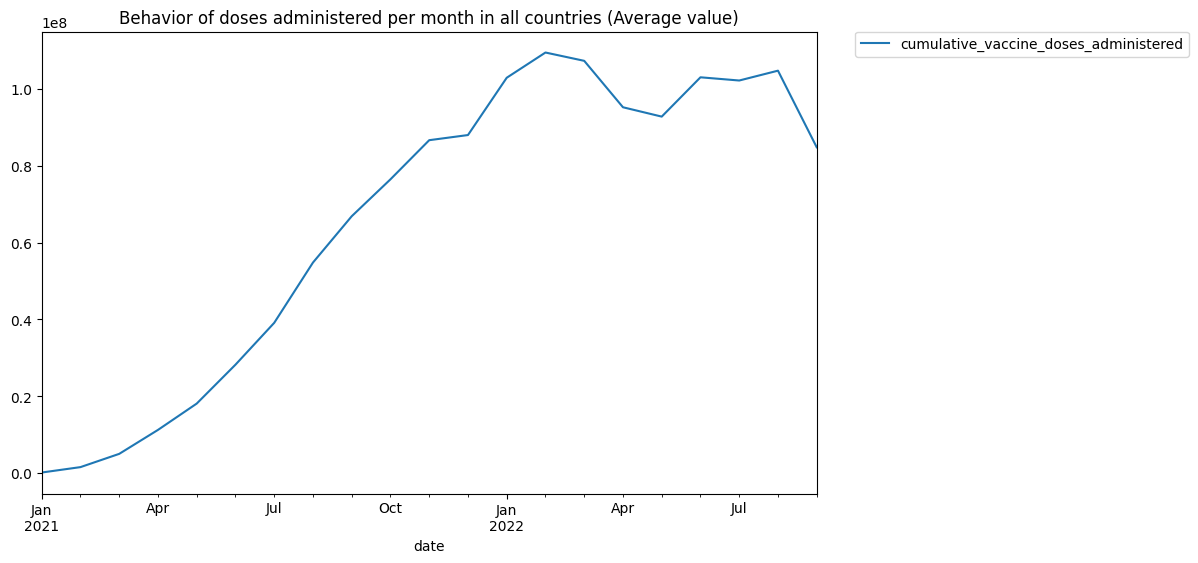

In [64]:
# Behavior of doses administered per month in all countries (Average value).

fig, ax = plt.subplots(figsize=(10, 6))
data_latam_countries_date.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Behavior of doses administered per month in all countries (Average value)')
plt.show


#### Evolución de dosis administradas por mes de cada país.


<function matplotlib.pyplot.show(close=None, block=None)>

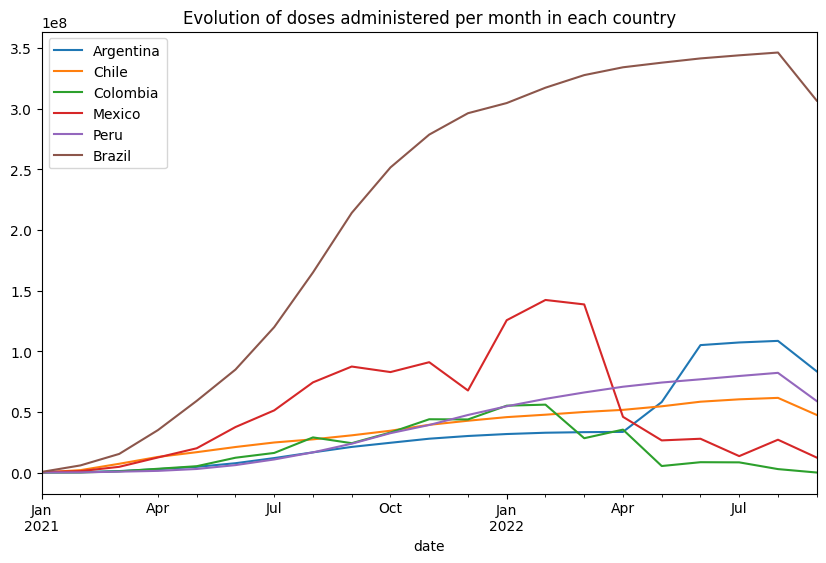

In [65]:
#Evolution of doses administered per month in each country.
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(selected_countries)
plt.title('Evolution of doses administered per month in each country')

plt.show

#### Muertes por mes de cada país.


<function matplotlib.pyplot.show(close=None, block=None)>

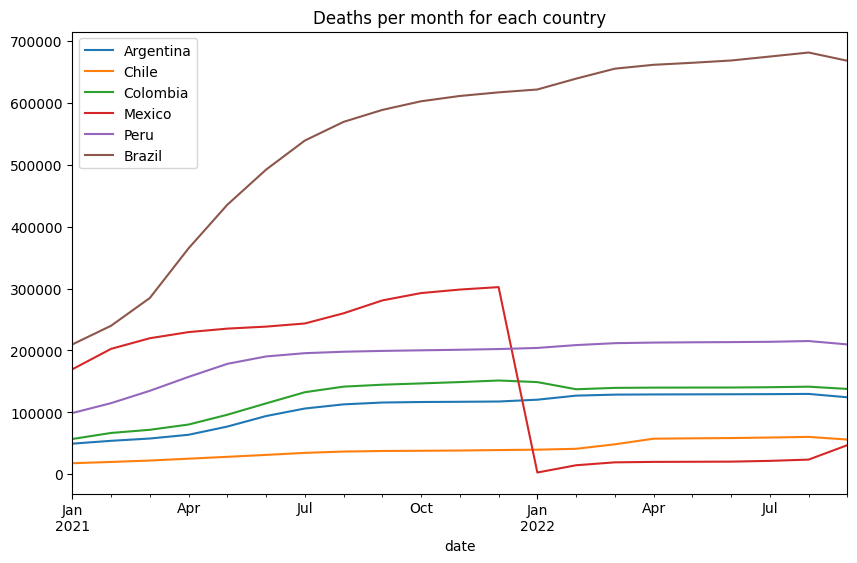

In [66]:
#Deaths per month for each country.
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(selected_countries)
plt.title('Deaths per month for each country')

plt.show

#### Casos confirmados por mes de cada país.


<function matplotlib.pyplot.show(close=None, block=None)>

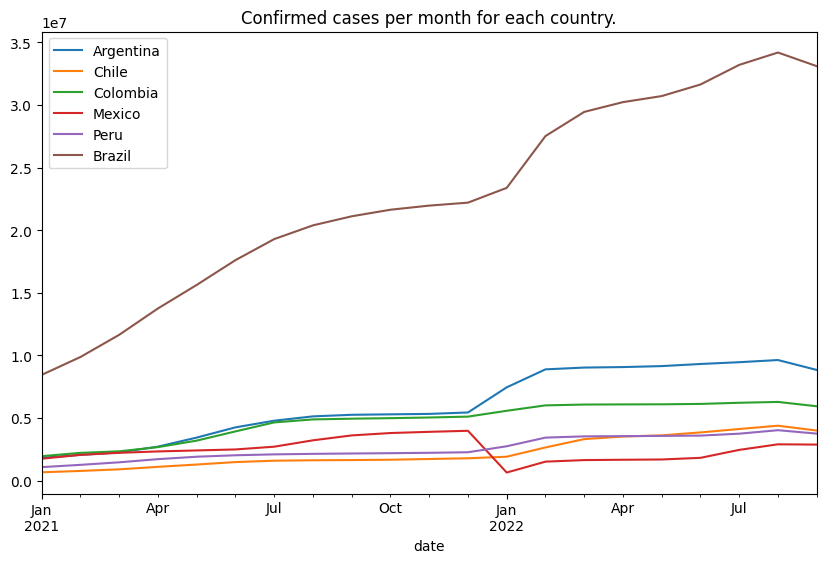

In [67]:
#Confirmed cases per month for each country.
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(selected_countries)
plt.title('Confirmed cases per month for each country.')

plt.show

#### Recuperaciones de casos por mes de cada país.


<function matplotlib.pyplot.show(close=None, block=None)>

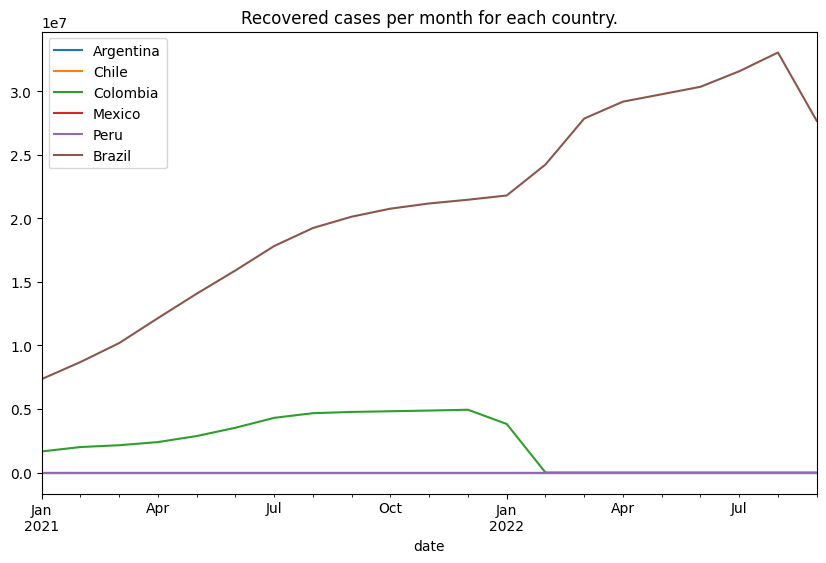

In [68]:
#Recovered cases per month for each country.
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(selected_countries)
plt.title('Recovered cases per month for each country.')

plt.show

#### Comparación del Número de Casos Nuevos entre Países.


<function matplotlib.pyplot.show(close=None, block=None)>

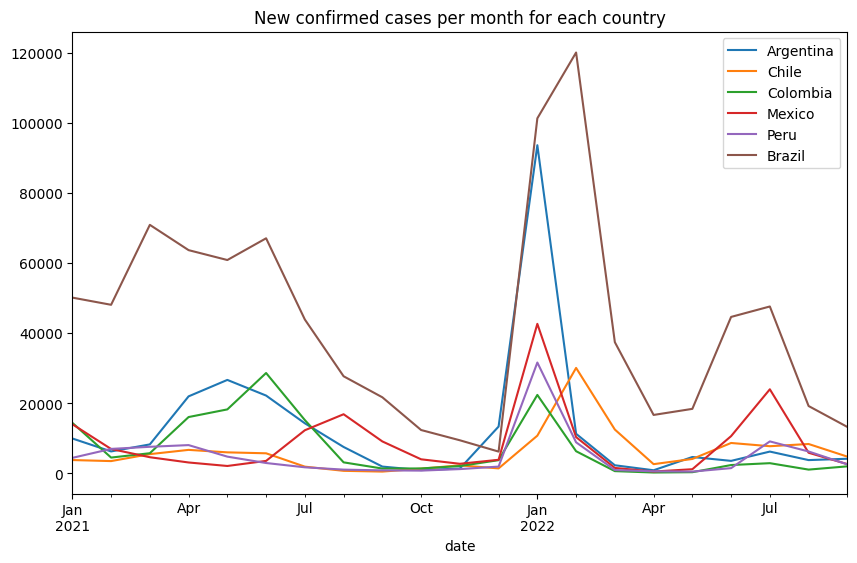

In [70]:
#New confirmed cases per month for each country.
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(selected_countries)
plt.title('New confirmed cases per month for each country')

plt.show

#####  Chile and Colombia were among the best countries to contain the pandemic

#### Dosis acumuladas por país


<function matplotlib.pyplot.show(close=None, block=None)>

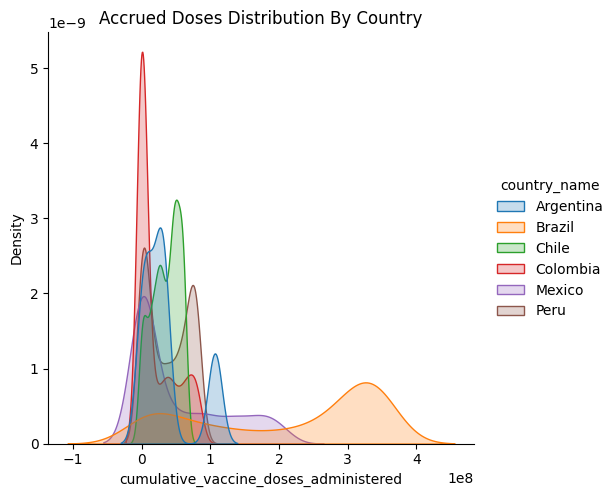

In [7]:
#Accrued Doses Distribution By Country.
sns.displot(data_latam_countries_date, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Accrued Doses Distribution By Country')
plt.show

##### Brasil y Mexico fueron los paises que no administraron menos supieron administar bien sus vacunas

#### Boxplot de temperatura media de cada país.


<function matplotlib.pyplot.show(close=None, block=None)>

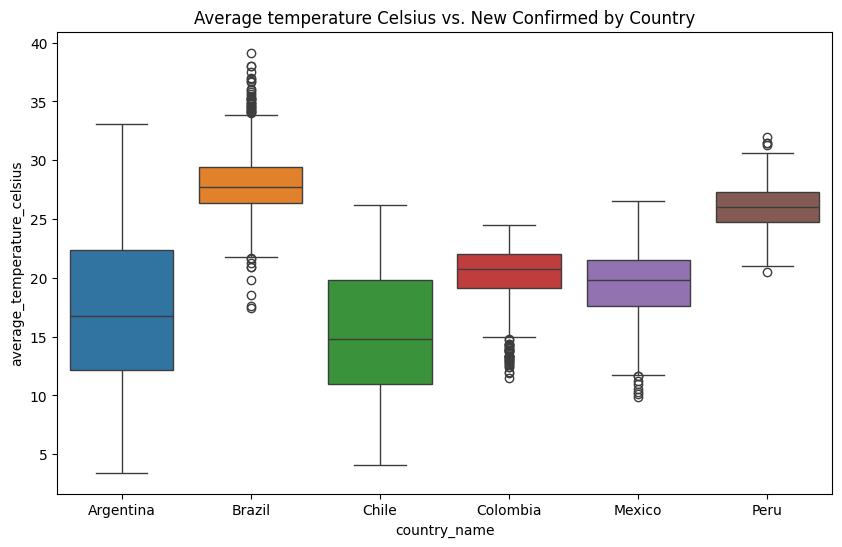

In [8]:
# Average temperature Celsius vs. New Confirmed by Country - boxplot

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_latam_countries_date, hue="country_name")
plt.title('Average temperature Celsius vs. New Confirmed by Country')
plt.show

##### De acuerdo a la temperatura por cada país se puede inferir que Chile ha manejado mejor la situación de evitar nuevos contagios

#### Violinplot de las variables que “Sí” tenga cambios de valores.

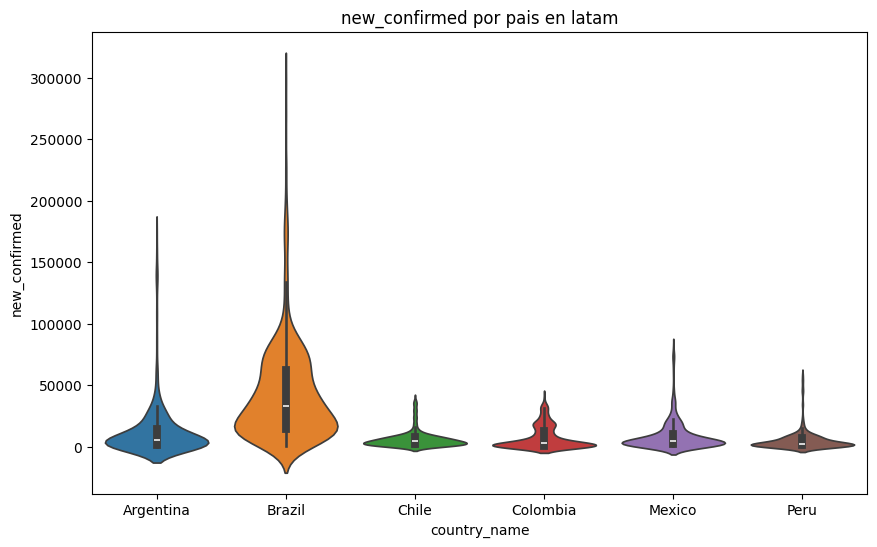

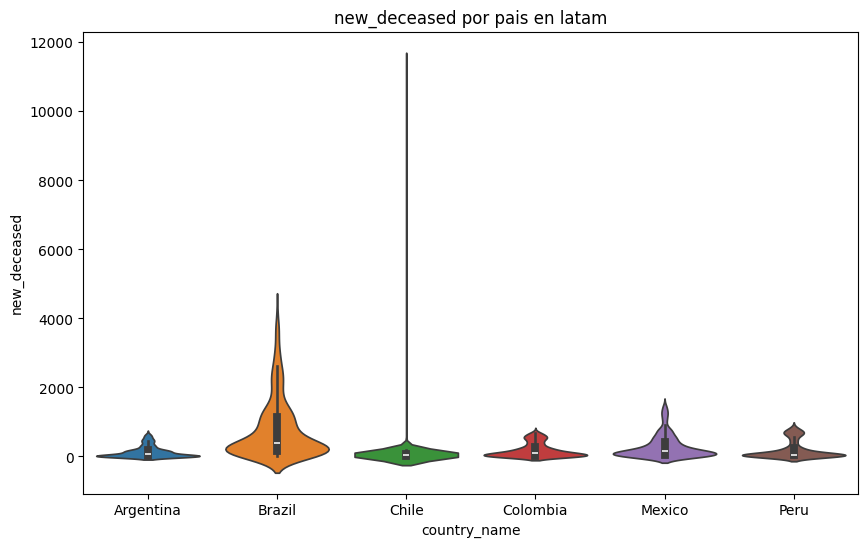

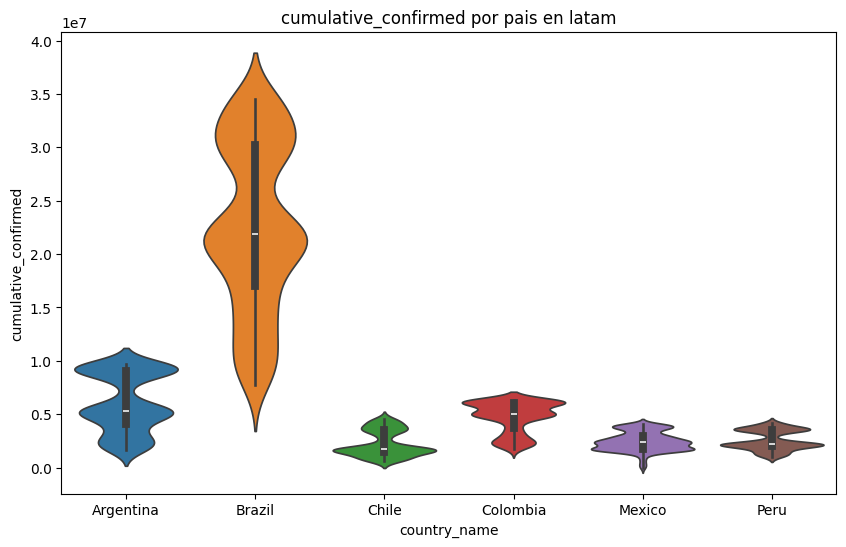

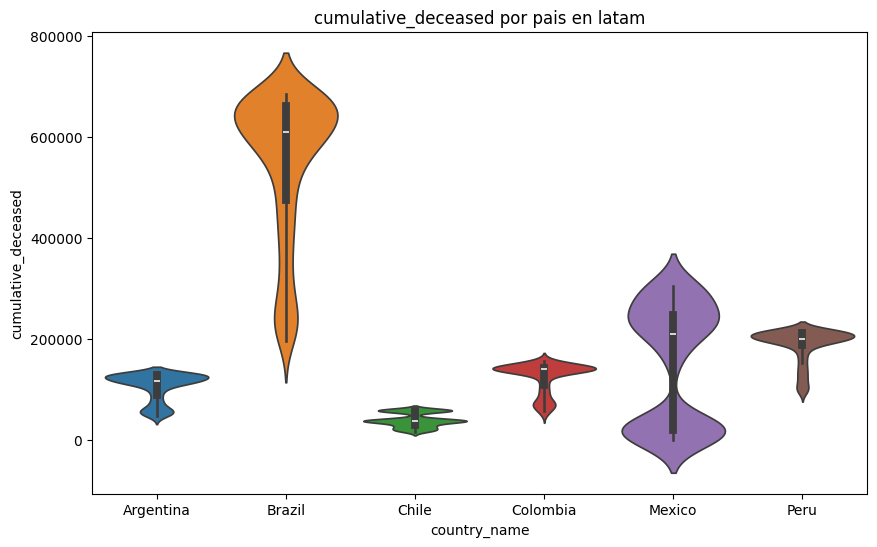

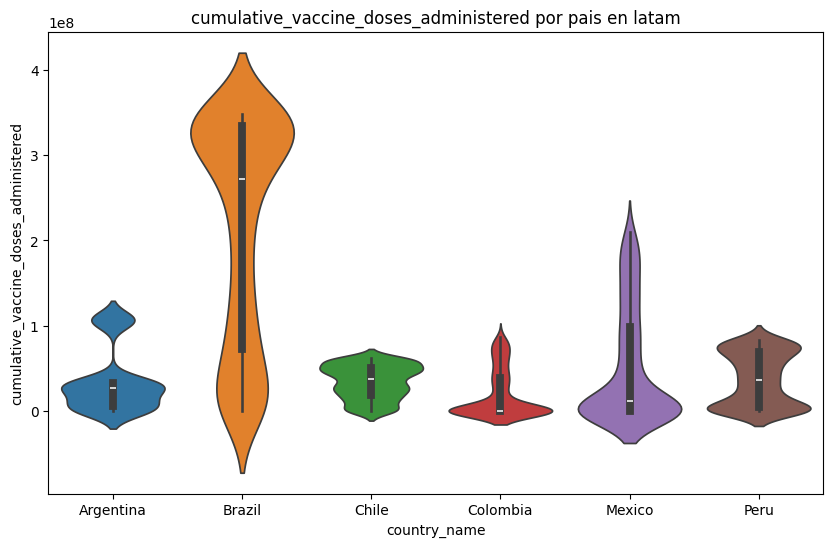

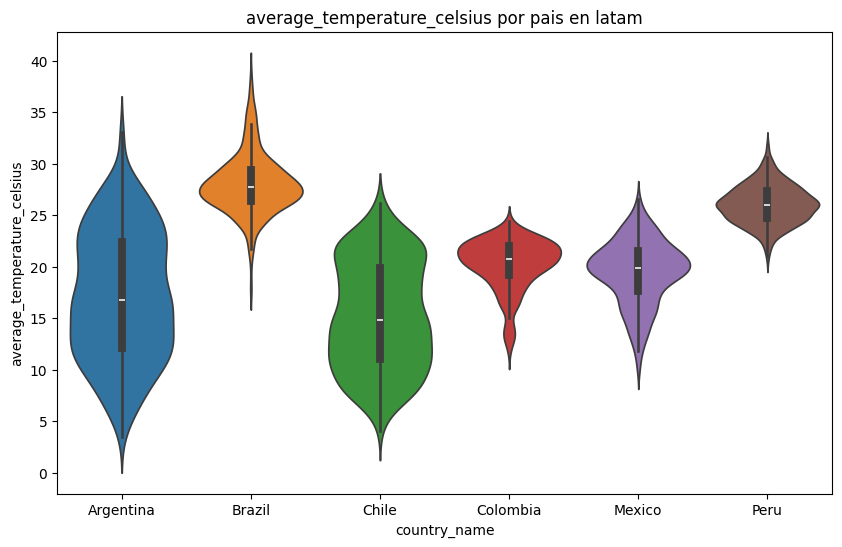

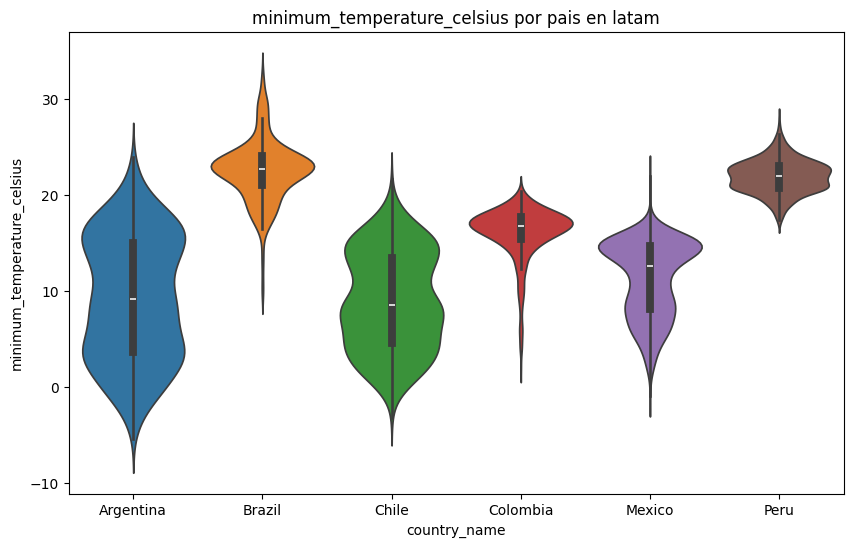

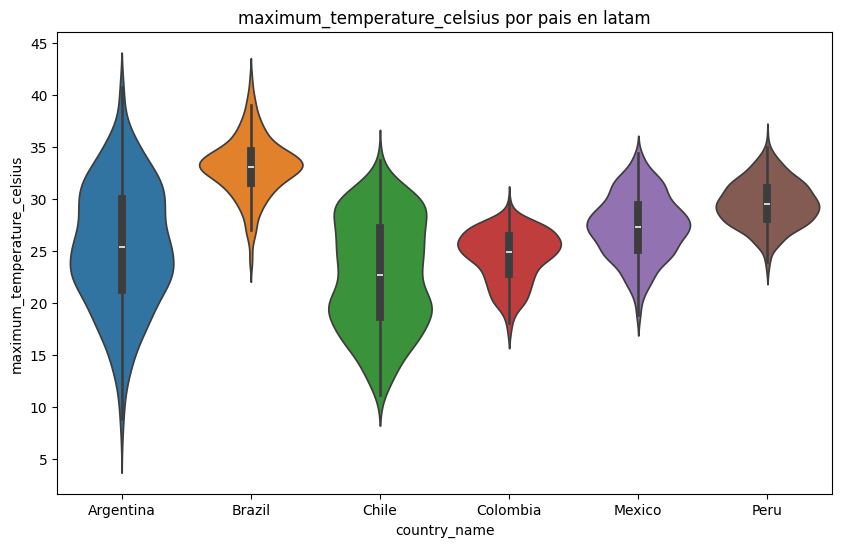

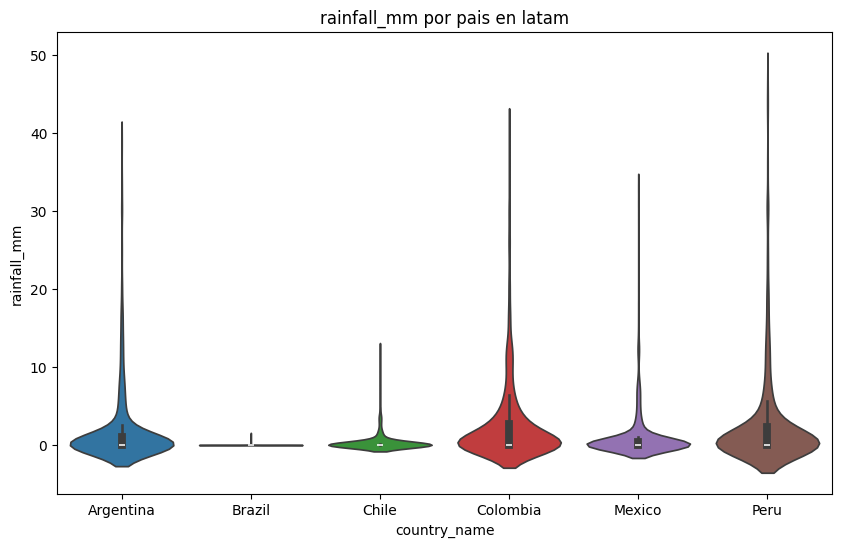

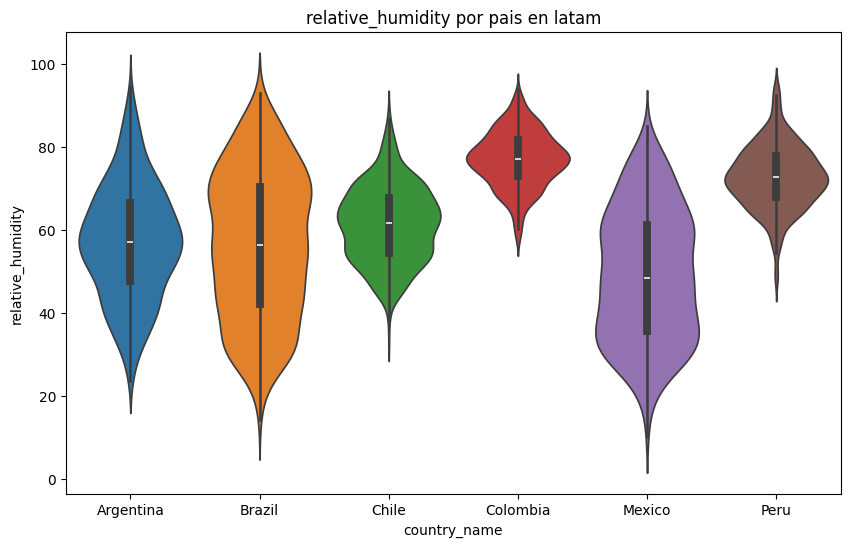

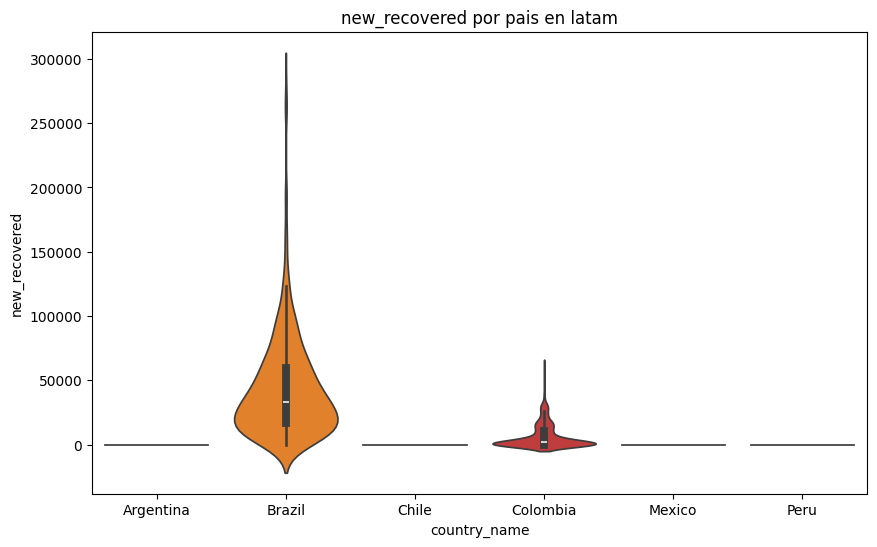

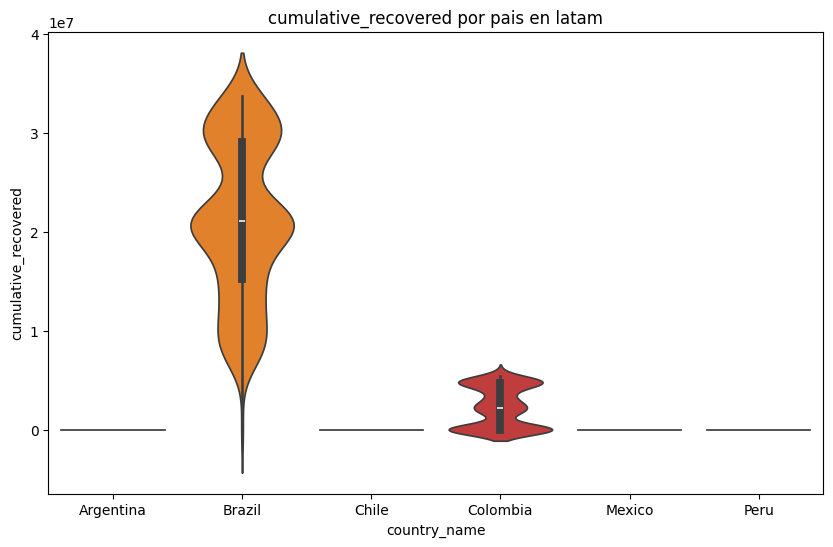

In [11]:
#Creation of Dataframe with columns greater than 6 different from the six latam countries
columns_greater_6=[]
for i in data_latam_countries_date.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if data_latam_countries_date[i].nunique() > 6:
            columns_greater_6.append(i)

columns_greater_6.append('country_name')

data_latam_countries_greater_6 = data_latam_countries_date[columns_greater_6]

# Violinplots for columns greater than 6 different from the six latam countries
for i in data_latam_countries_greater_6.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=data_latam_countries_greater_6, hue="country_name")
        plt.title(f"{i} por pais en latam")
        plt.show


#### Distribución de la población por grupos de edad.


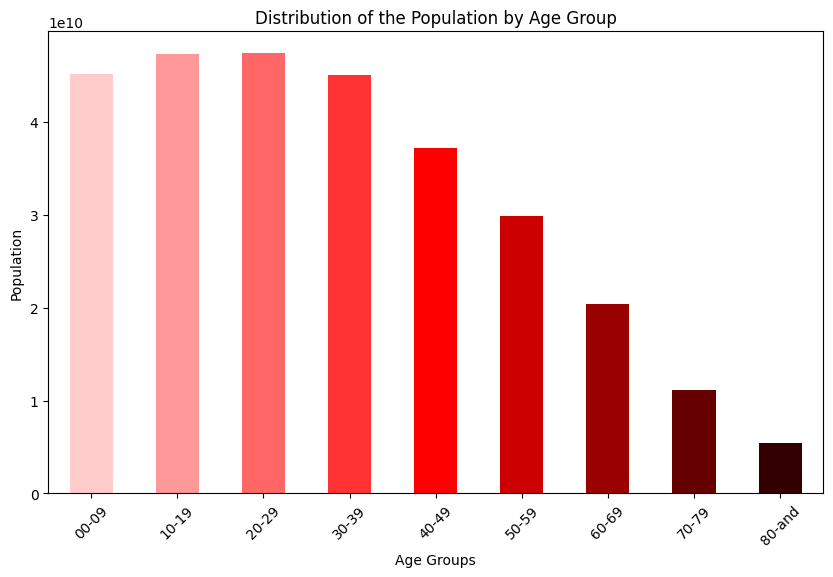

In [17]:
# Calculate the distribution of the population by population_age_groups
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Sum the population in each age group across all countries
age_distribution = data_latam_countries_date[age_columns].sum()

# Plot the age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True, color=['#FFCCCC', '#FF9999', '#FF6666', '#FF3333', '#FF0000', '#CC0000', '#990000', '#660000', '#330000'])
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribution of the Population by Age Group')
plt.xticks(range(len(age_columns)), [col.split('_')[2] + '-' + col.split('_')[3] for col in age_columns], rotation=45)

plt.show()



##### Esta gráfica de la población segmentada nos ayudará al análisis de cantidad de vacunas por edades

<function matplotlib.pyplot.show(close=None, block=None)>

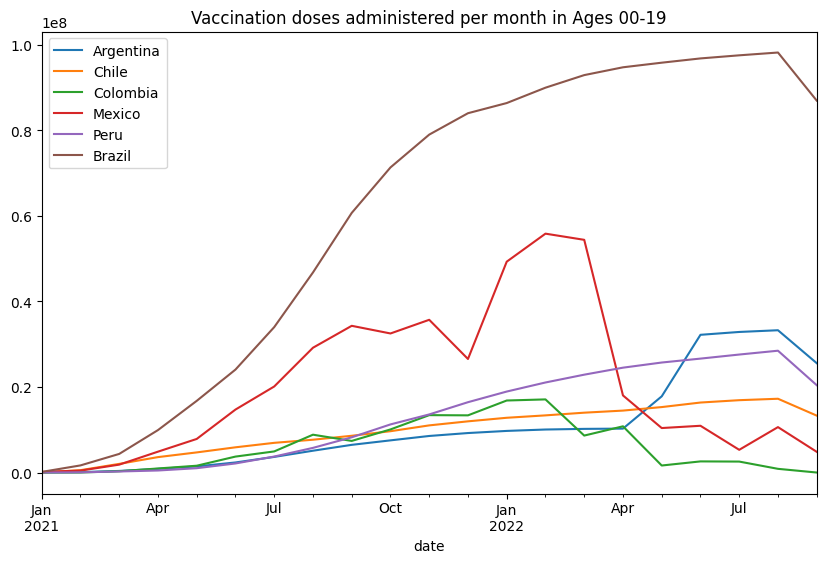

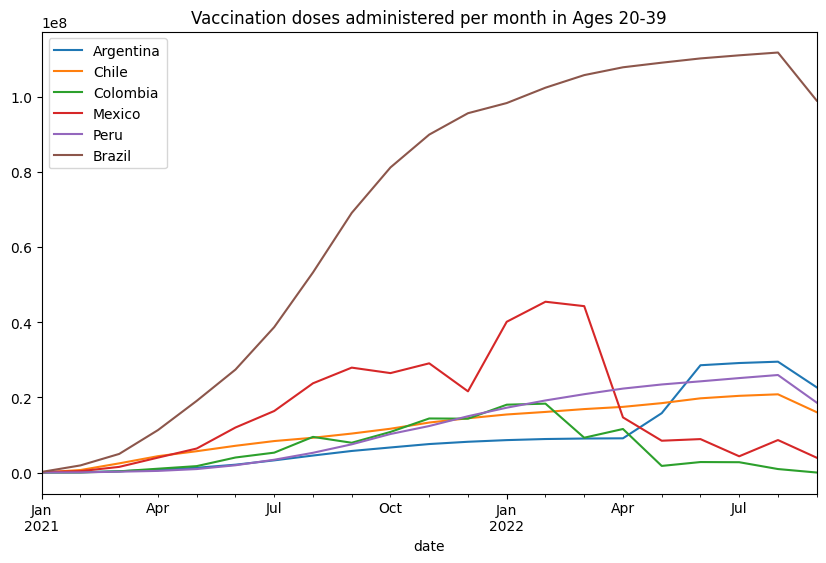

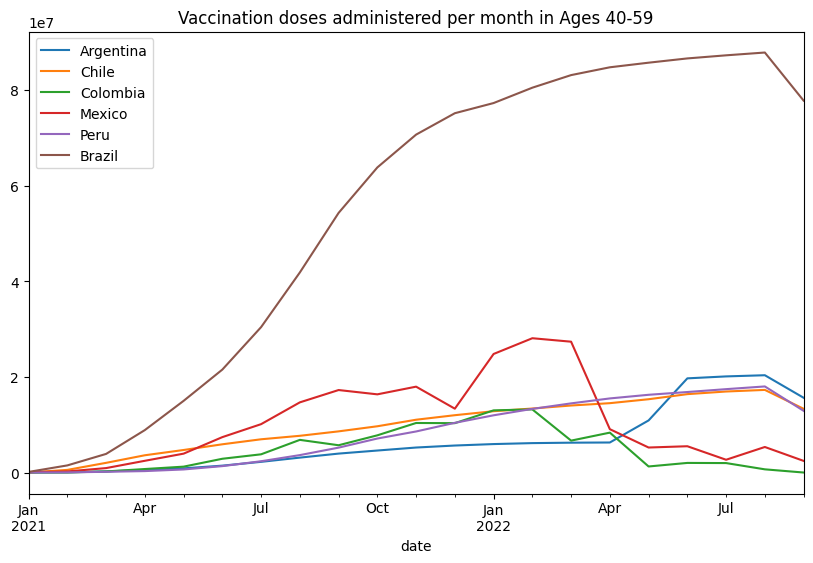

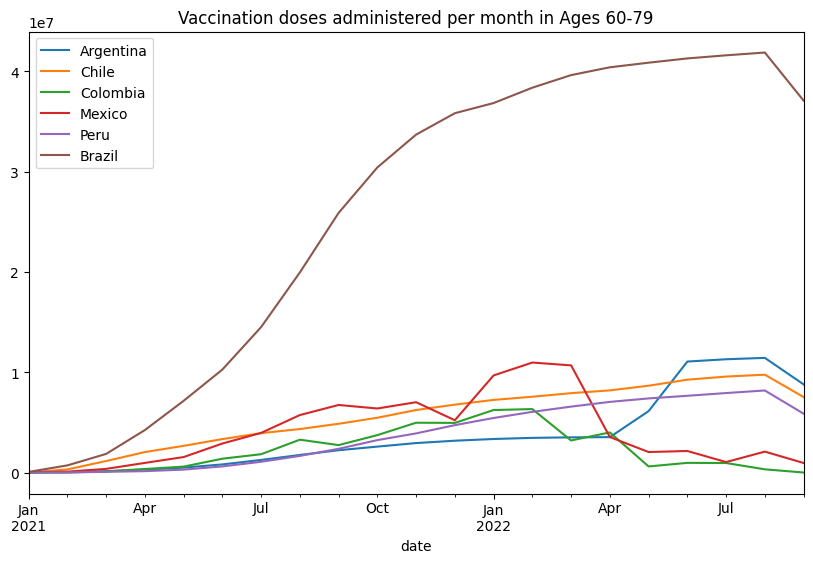

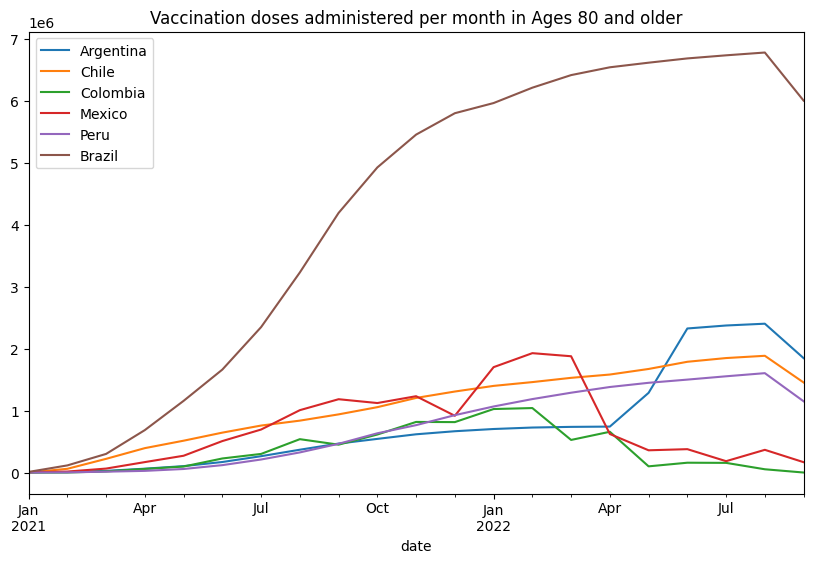

In [18]:
# Age group with more vaccination doses
data_latam_countries_date['population_age_00_19']=data_latam_countries_date['population_age_00_09']+data_latam_countries_date['population_age_10_19']
data_latam_countries_date['population_age_20_39']=data_latam_countries_date['population_age_20_29']+data_latam_countries_date['population_age_30_39']
data_latam_countries_date['population_age_40_59']=data_latam_countries_date['population_age_40_49']+data_latam_countries_date['population_age_50_59']
data_latam_countries_date['population_age_60_79']=data_latam_countries_date['population_age_60_69']+data_latam_countries_date['population_age_70_79']
data_latam_countries_date['population_age_80_and_older']=data_latam_countries_date['population_age_80_and_older']

data_latam_countries_date['population_age_00_19_vaccinated']=data_latam_countries_date['cumulative_vaccine_doses_administered']*data_latam_countries_date['population_age_00_19']/data_latam_countries_date['population']
data_latam_countries_date['population_age_20_39_vaccinated']=data_latam_countries_date['cumulative_vaccine_doses_administered']*data_latam_countries_date['population_age_20_39']/data_latam_countries_date['population']
data_latam_countries_date['population_age_40_59_vaccinated']=data_latam_countries_date['cumulative_vaccine_doses_administered']*data_latam_countries_date['population_age_40_59']/data_latam_countries_date['population']
data_latam_countries_date['population_age_60_79_vaccinated']=data_latam_countries_date['cumulative_vaccine_doses_administered']*data_latam_countries_date['population_age_60_79']/data_latam_countries_date['population']
data_latam_countries_date['population_age_80_and_older_vaccinated']=data_latam_countries_date['cumulative_vaccine_doses_administered']*data_latam_countries_date['population_age_80_and_older']/data_latam_countries_date['population']

data_latam_countries_date['population_age_00_19_vaccinated']=data_latam_countries_date['population_age_00_19_vaccinated'].fillna(0)
data_latam_countries_date['population_age_20_39_vaccinated']=data_latam_countries_date['population_age_20_39_vaccinated'].fillna(0)
data_latam_countries_date['population_age_40_59_vaccinated']=data_latam_countries_date['population_age_40_59_vaccinated'].fillna(0)
data_latam_countries_date['population_age_60_79_vaccinated']=data_latam_countries_date['population_age_60_79_vaccinated'].fillna(0)
data_latam_countries_date['population_age_80_and_older_vaccinated']=data_latam_countries_date['population_age_80_and_older_vaccinated'].fillna(0)

data_latam_countries_date['population_age_00_19_vaccinated']=data_latam_countries_date['population_age_00_19_vaccinated'].astype(int)
data_latam_countries_date['population_age_20_39_vaccinated']=data_latam_countries_date['population_age_20_39_vaccinated'].astype(int)
data_latam_countries_date['population_age_40_59_vaccinated']=data_latam_countries_date['population_age_40_59_vaccinated'].astype(int)
data_latam_countries_date['population_age_60_79_vaccinated']=data_latam_countries_date['population_age_60_79_vaccinated'].astype(int)
data_latam_countries_date['population_age_80_and_older_vaccinated']=data_latam_countries_date['population_age_80_and_older_vaccinated'].astype(int)

data_latam_countries_date['population_age_00_19_vaccinated'].sum()
data_latam_countries_date['population_age_20_39_vaccinated'].sum()
data_latam_countries_date['population_age_40_59_vaccinated'].sum()
data_latam_countries_date['population_age_60_79_vaccinated'].sum()
data_latam_countries_date['population_age_80_and_older_vaccinated'].sum()

# Graph of average values of latam countries vs cumulative_vaccine_doses_administered

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['population_age_00_19_vaccinated'].plot()
plt.title('Vaccination doses administered per month in Ages 00-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(selected_countries)
plt.show

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['population_age_20_39_vaccinated'].plot()
plt.title('Vaccination doses administered per month in Ages 20-39')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(selected_countries)
plt.show

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['population_age_40_59_vaccinated'].plot()
plt.title('Vaccination doses administered per month in Ages 40-59')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(selected_countries)
plt.show

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['population_age_60_79_vaccinated'].plot()
plt.title('Vaccination doses administered per month in Ages 60-79')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(selected_countries)
plt.show

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    data_latam_countries_date[data_latam_countries_date['country_name'] == country].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vaccinated'].plot()
plt.title('Vaccination doses administered per month in Ages 80 and older')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(selected_countries)
plt.show

#### Mapa de calor de Métrica (new_deceased) por país.


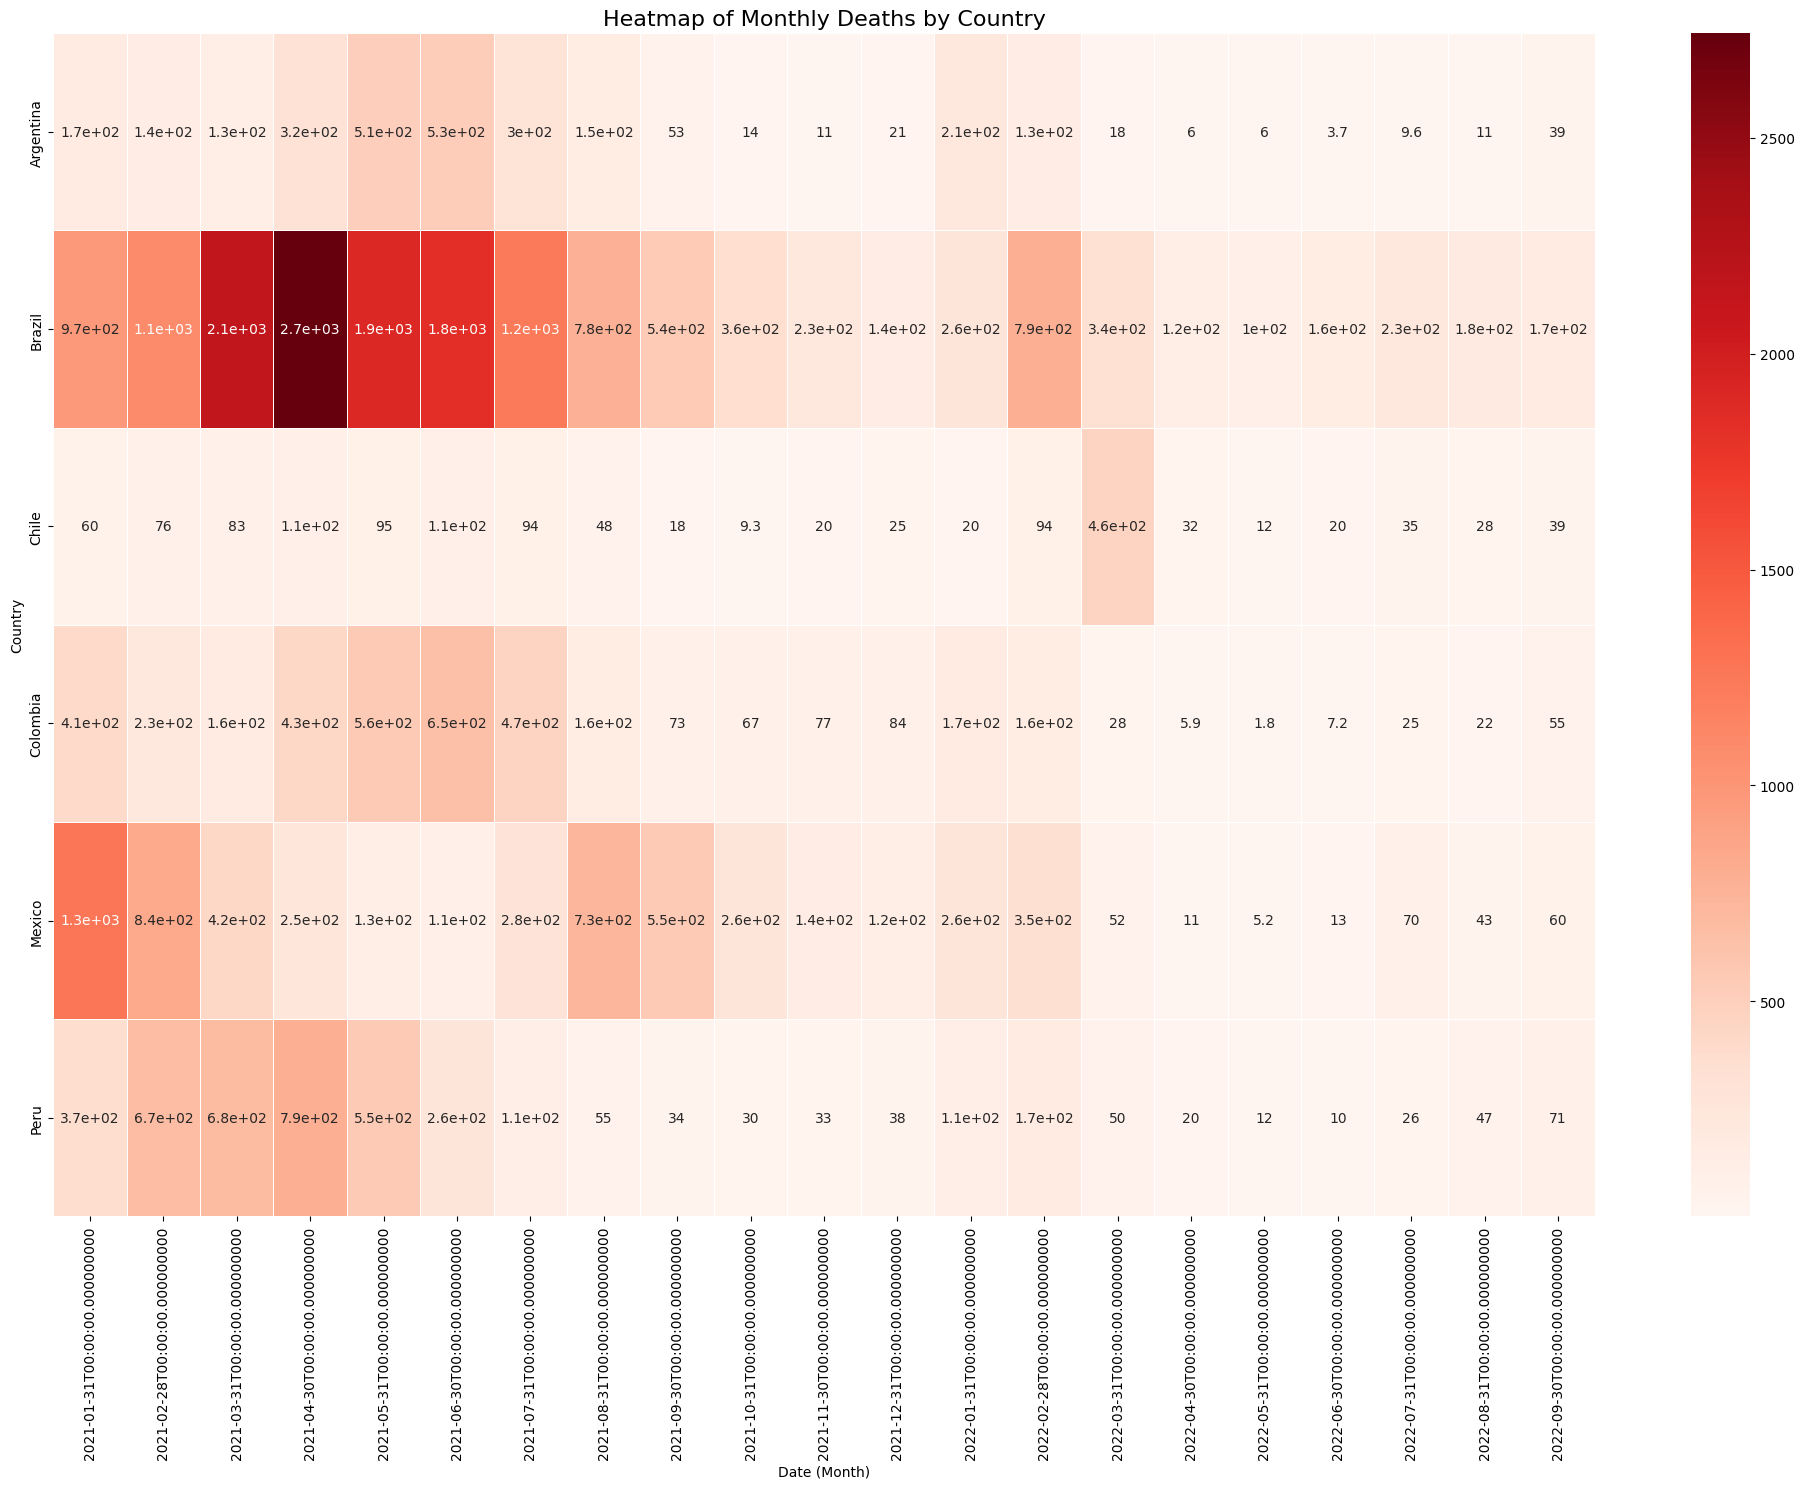

In [28]:
# Resample by month-end and calculate the mean of new_deceased for each country
heatmap_data = data_latam_countries_date.groupby('country_name').resample('ME').mean(numeric_only=True)['new_deceased'].unstack(level=0)

# Set up the figure size for the heatmap
plt.figure(figsize=(20, 15))

# Create the heatmap using seaborn
sns.heatmap(heatmap_data.T, cmap="Reds", linewidths=.5, annot=True)

# Add titles and labels
plt.title('Heatmap of Monthly Deaths by Country', fontsize=16)
plt.xlabel('Date (Month)', fontsize=10)
plt.ylabel('Country', fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()




#### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

<function matplotlib.pyplot.show(close=None, block=None)>

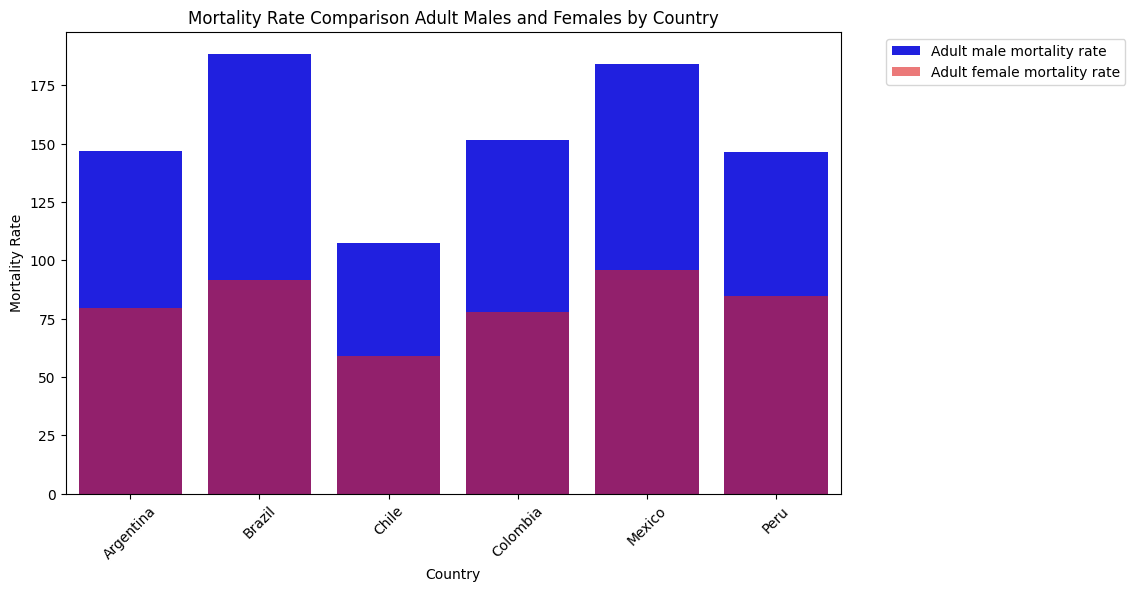

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_latam_countries_date, x='country_name', y='adult_male_mortality_rate', color='blue', label='Adult male mortality rate')
sns.barplot(data=data_latam_countries_date, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Adult female mortality rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.xlabel('Country')
plt.title('Mortality Rate Comparison Adult Males and Females by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

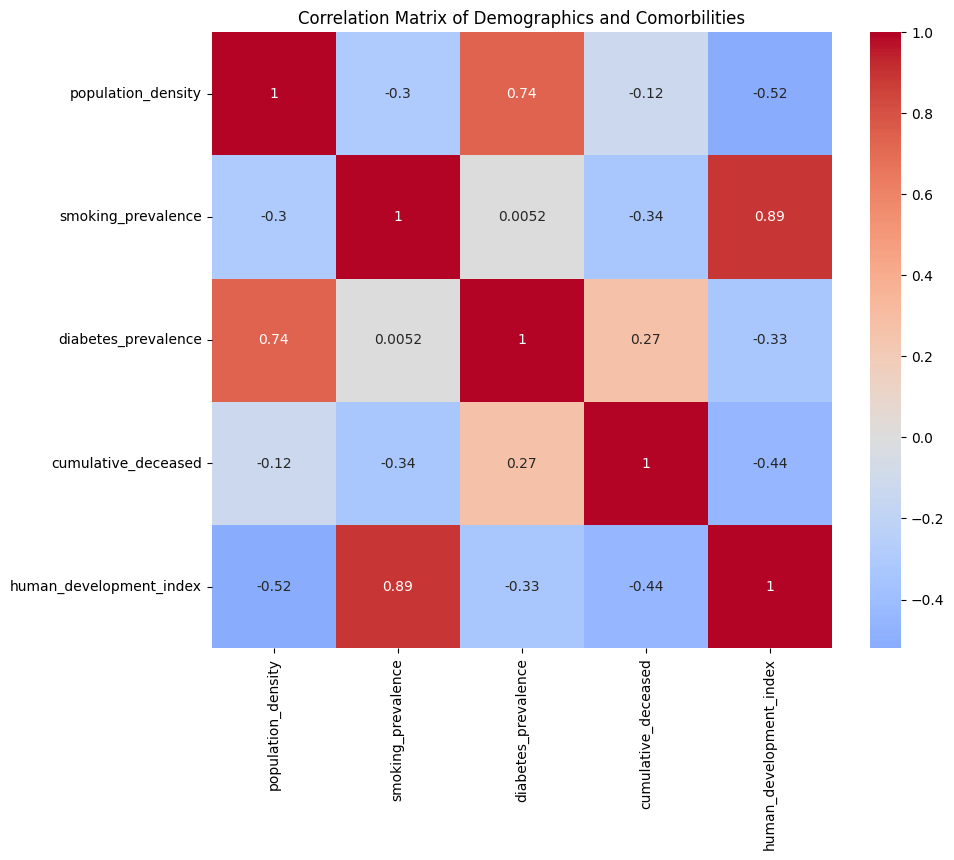

In [33]:
# Subset of columns for correlation analysis
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']

# Correlation matrix
correlation_matrix = data_latam_countries_date[columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0)
plt.title('Correlation Matrix of Demographics and Comorbilities')
plt.show()

##### Fumar y tener Diabetes han sido las enfermedades preexistentes que más has afectado a los paises seleccionados de latam, estas enfermedades no son las únicas sino las más comunes.

#### Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

<function matplotlib.pyplot.show(close=None, block=None)>

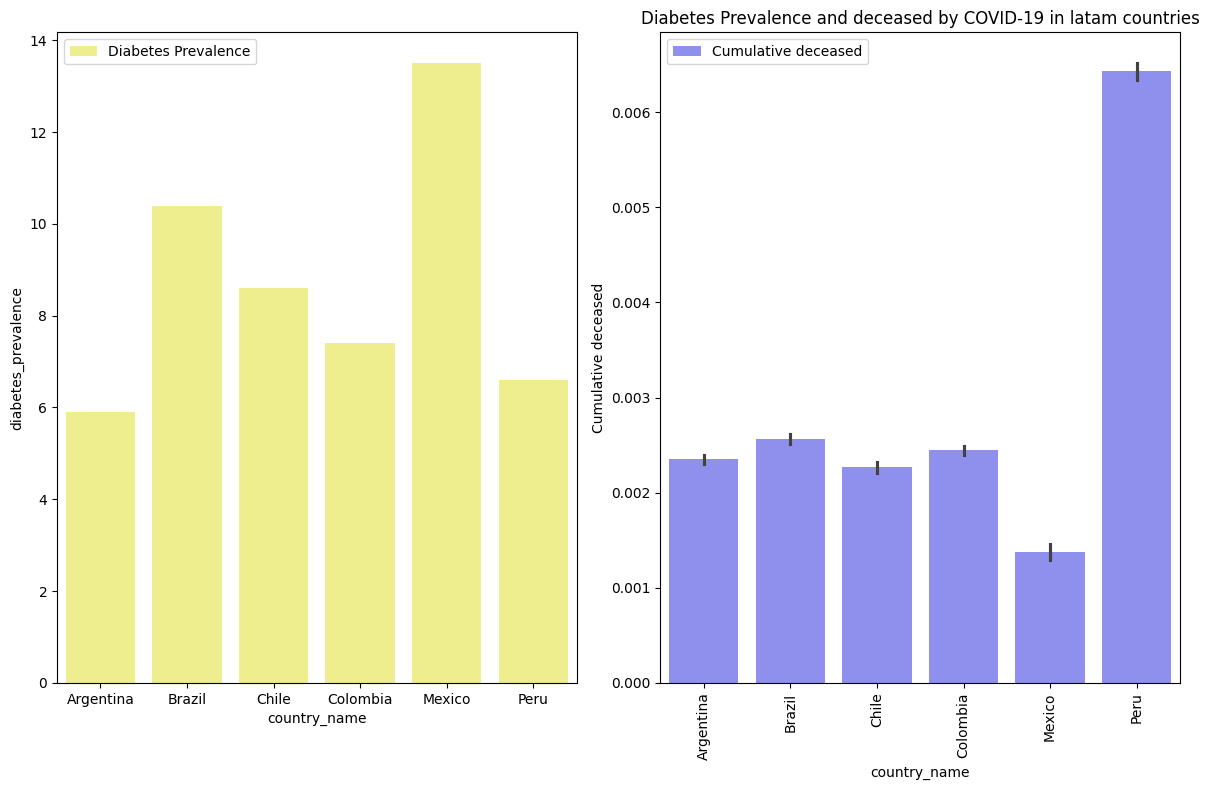

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data_latam_countries_date, x= data_latam_countries_date['country_name'], y= data_latam_countries_date['diabetes_prevalence'], color='yellow', alpha=0.5, label='Diabetes Prevalence', ax=ax1)
ax = ax.twinx()
sns.barplot(data=data_latam_countries_date, x= data_latam_countries_date['country_name'], y= data_latam_countries_date['cumulative_deceased'] / data_latam_countries_date['population'], color='blue', alpha=0.5, label='Cumulative deceased', ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Diabetes Prevalence')
ax2.set_ylabel('Cumulative deceased')
plt.title('Diabetes Prevalence and deceased by COVID-19 in latam countries')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

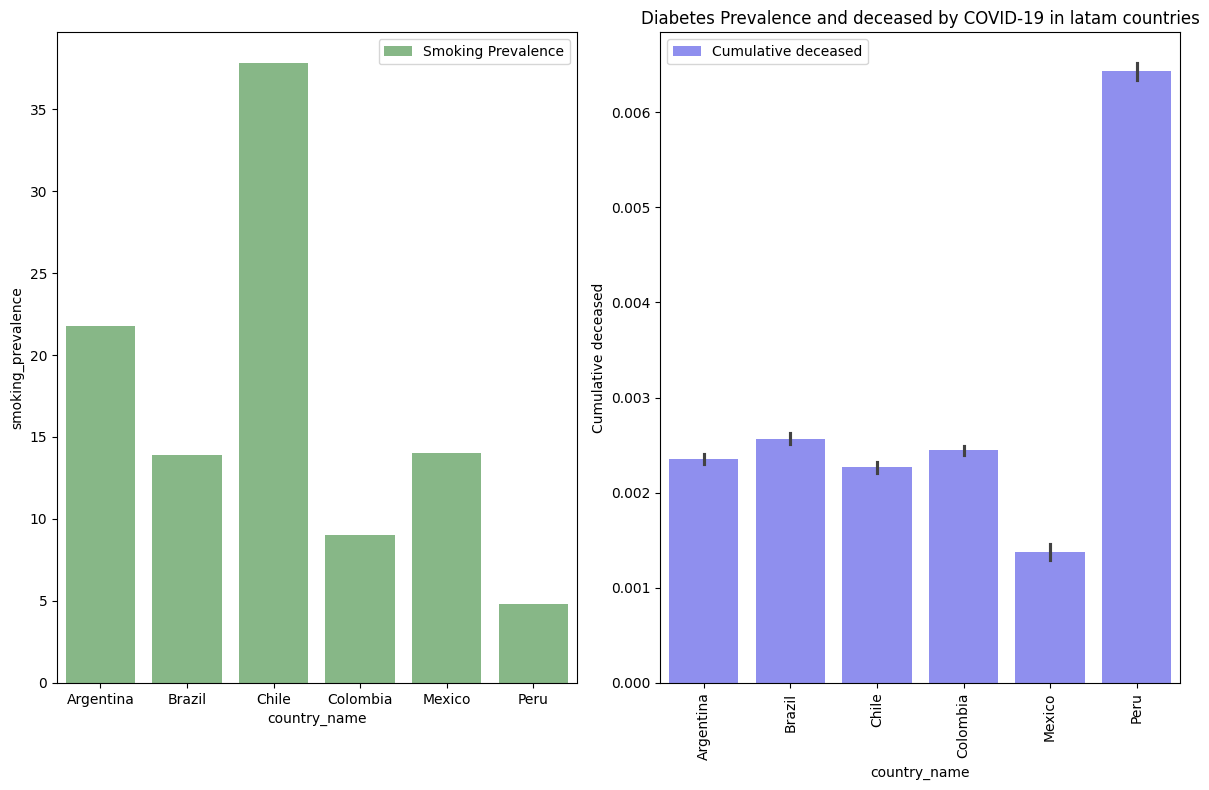

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data_latam_countries_date, x= data_latam_countries_date['country_name'], y= data_latam_countries_date['smoking_prevalence'], color='green', alpha=0.5, label='Smoking Prevalence', ax=ax1)
ax = ax.twinx()
sns.barplot(data=data_latam_countries_date, x= data_latam_countries_date['country_name'], y= data_latam_countries_date['cumulative_deceased'] / data_latam_countries_date['population'], color='blue', alpha=0.5, label='Cumulative deceased', ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Diabetes Prevalence')
ax2.set_ylabel('Cumulative deceased')
plt.title('Diabetes Prevalence and deceased by COVID-19 in latam countries')
plt.tight_layout()
plt.show

### Avance 3

In [2]:
# DataFrame Clean Data Load

data_latam_countries_date = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

In [3]:
def describe_data(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print(i)
            print('Mediana',data[i].median())
            print('Varianza',data[i].var())
            print('Rango',data[i].max() - data[i].min())
            print('Moda',data[i].mode())
            print('\n')

describe_data(data_latam_countries_date) #selected_countries)

new_confirmed
Mediana 5214.0
Varianza 586568966.085013
Rango 298408.0
Moda 0    0.0
Name: new_confirmed, dtype: float64


new_deceased
Mediana 100.5
Varianza 257292.47863447666
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64


cumulative_confirmed
Mediana 3632143.5
Varianza 63828420111296.516
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64


cumulative_deceased
Mediana 139614.0
Varianza 33415398047.038906
Rango 685202.0
Moda 0     128994.0
1     129016.0
2     129070.

In [4]:
selected_countries = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

In [5]:
# Set 'date' as the index
data_latam_countries_date['date'] = pd.to_datetime(data_latam_countries_date['date'])
data_latam_countries_date.set_index('date', inplace=True)

# Display the filtered data
print(data_latam_countries_date.head())

           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_va

#### Análisis del Evolución de casos nuevos semanal y anual - groupby

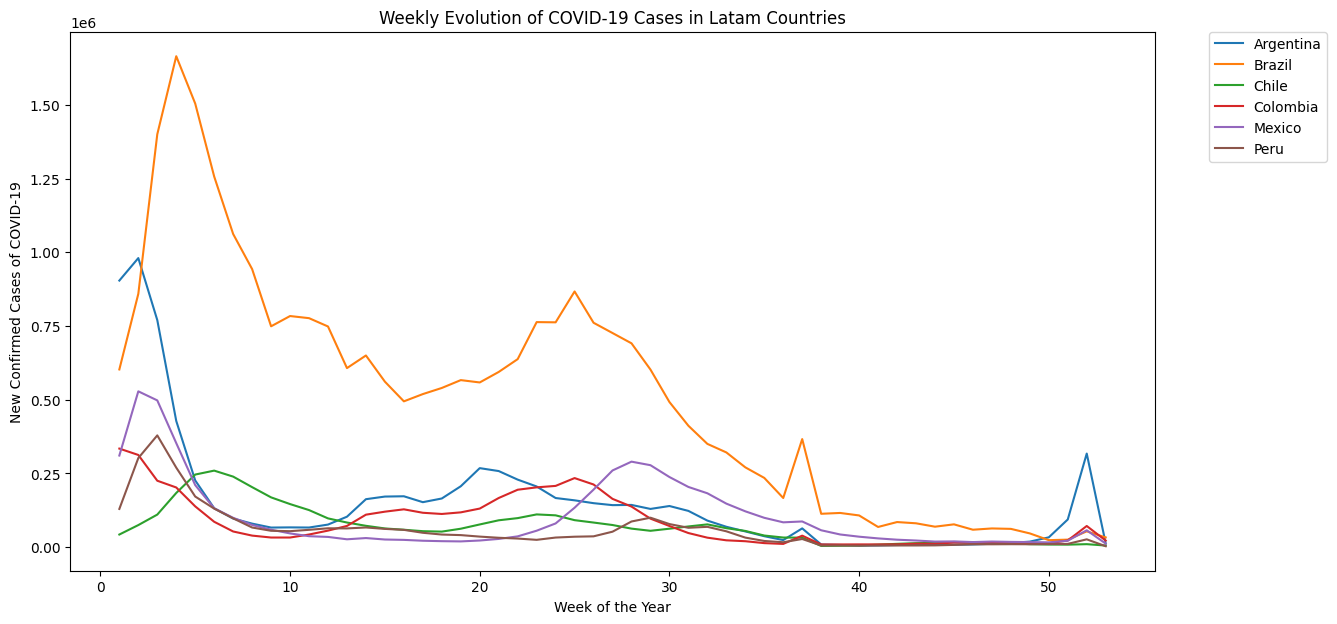

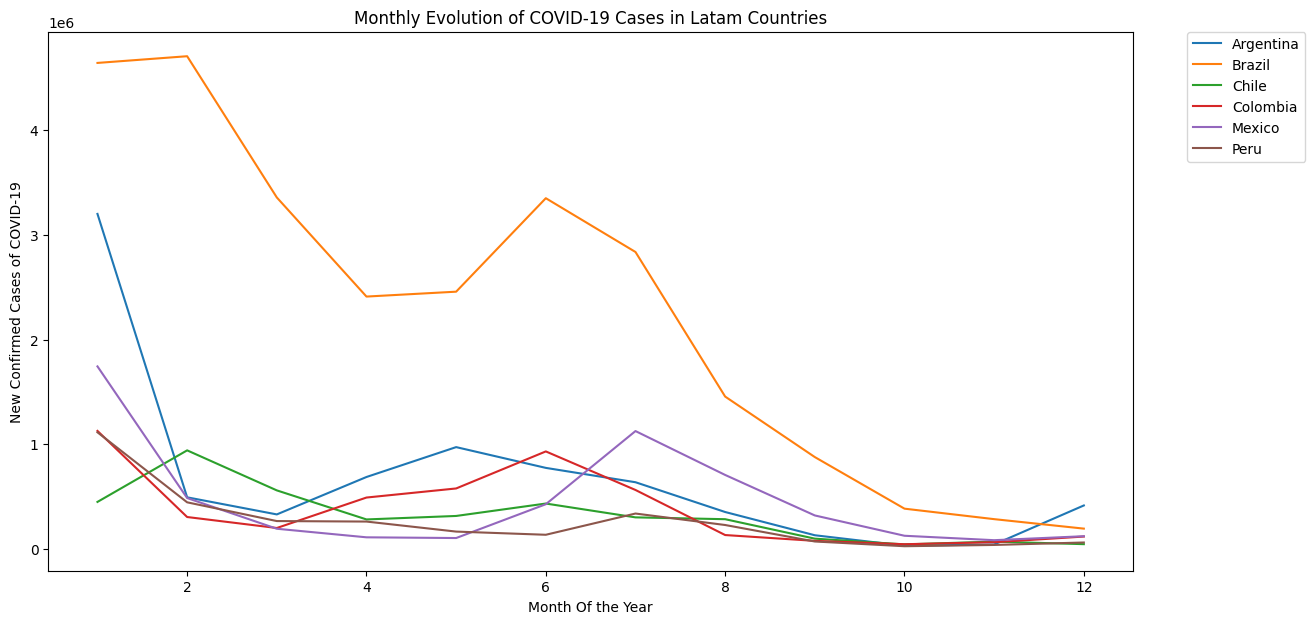

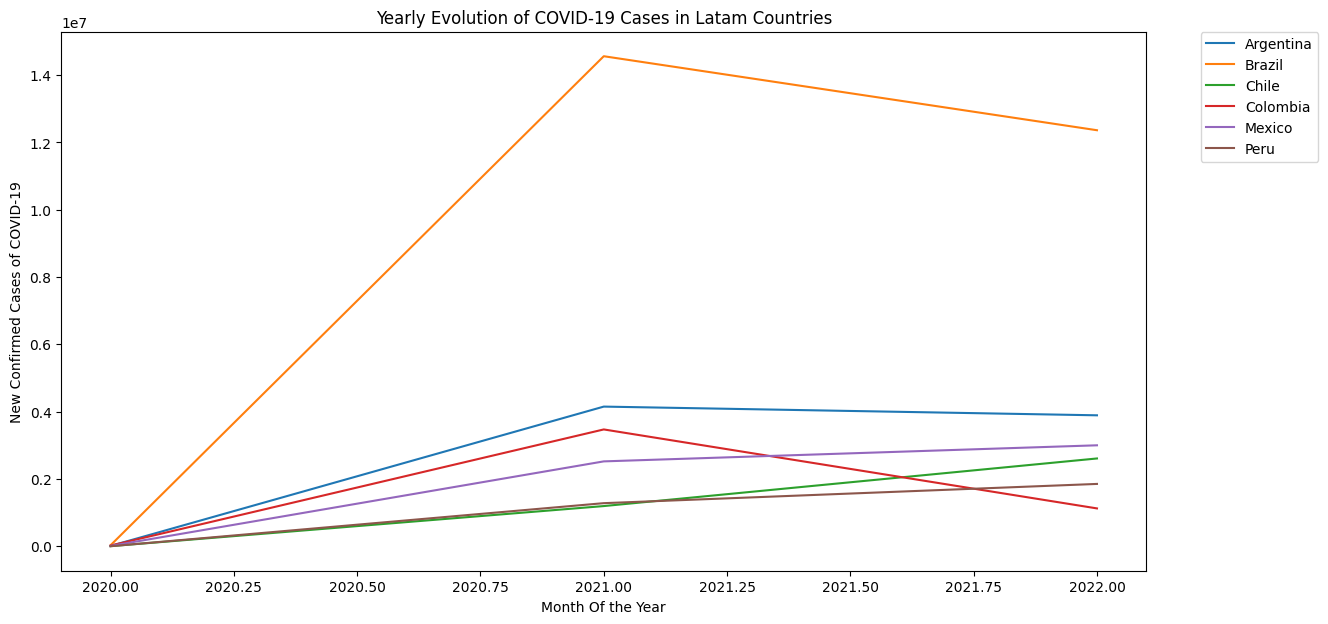

In [6]:
# Analysis of evolution of COVID-19 cases in latam countries through time - Weekly and Yearly

data_latam_countries_date['week'] = data_latam_countries_date.index.isocalendar().week
weekly_cases = data_latam_countries_date.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Weekly Evolution of COVID-19 Cases in Latam Countries')
plt.xlabel('Week of the Year')
plt.ylabel('New Confirmed Cases of COVID-19')
plt.show()

# Now Monthly (per Year)
data_latam_countries_date['month'] = data_latam_countries_date.index.month
monthly_cases = data_latam_countries_date.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 7))
for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    plt.plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=country)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Monthly Evolution of COVID-19 Cases in Latam Countries')
plt.xlabel('Month Of the Year')
plt.ylabel('New Confirmed Cases of COVID-19')
plt.show()

# Now Yearly
data_latam_countries_date['year'] = data_latam_countries_date.index.isocalendar().year
yearly_cases = data_latam_countries_date.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['year'], country_yearly_cases['new_confirmed'], label=country)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Yearly Evolution of COVID-19 Cases in Latam Countries')
plt.xlabel('Month Of the Year')
plt.ylabel('New Confirmed Cases of COVID-19')
plt.show()


#### Progreso de Vacunación por País

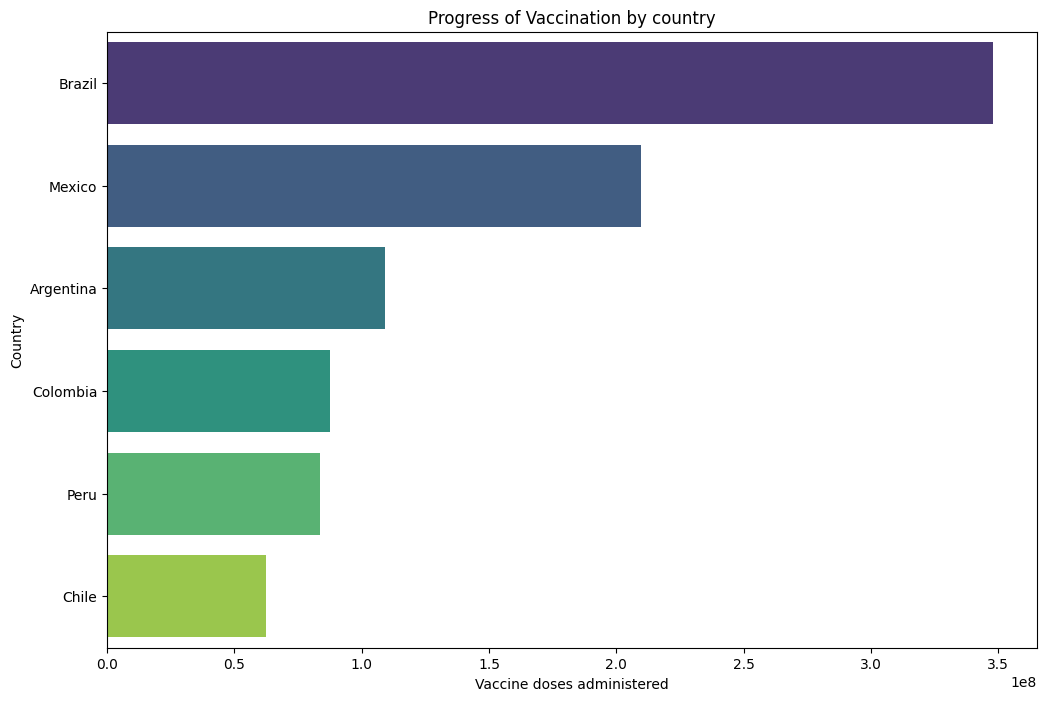

In [7]:
vaccination_data = data_latam_countries_date.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= vaccination_data.values, y= vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Vaccine doses administered')
plt.ylabel('Country')
plt.title('Progress of Vaccination by country')

plt.show()

#### Nuevos Casos Confirmados de COVID-19 y Temperaturas Promedio a lo largo del tiempo

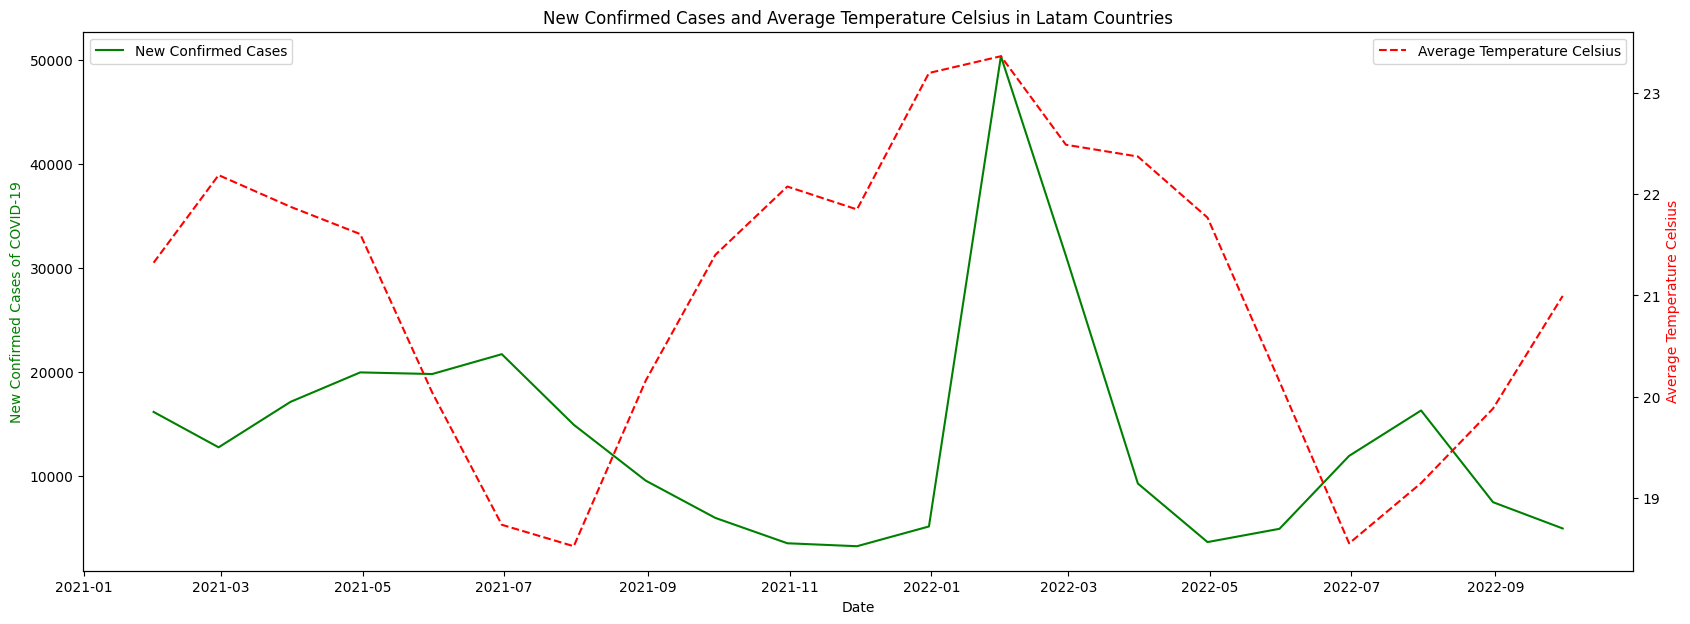

In [9]:
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latam_countries_date.resample('ME').mean(numeric_only=True).index, data_latam_countries_date.resample('ME').mean(numeric_only=True)['new_confirmed'], color='green', label='New Confirmed Cases')
ax2.plot(data_latam_countries_date.resample('ME').mean(numeric_only=True).index, data_latam_countries_date.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='red', label='Average Temperature Celsius', linestyle='dashed')

ax1.set_xlabel('Date')
ax1.set_ylabel('New Confirmed Cases of COVID-19', color='green')
ax2.set_ylabel('Average Temperature Celsius', color='red')
plt.title('New Confirmed Cases and Average Temperature Celsius in Latam Countries')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

##### La temperatura y los casos aumentaron durante el verano del hemisferio sur en enero de 2022, y a medida que bajaba la temperatura bajaron los casos, debido a posibles políticas de cuarentena o efectividad de la vacunación.

#### Impacto de la Urbanización en la Propagación del Covid-19

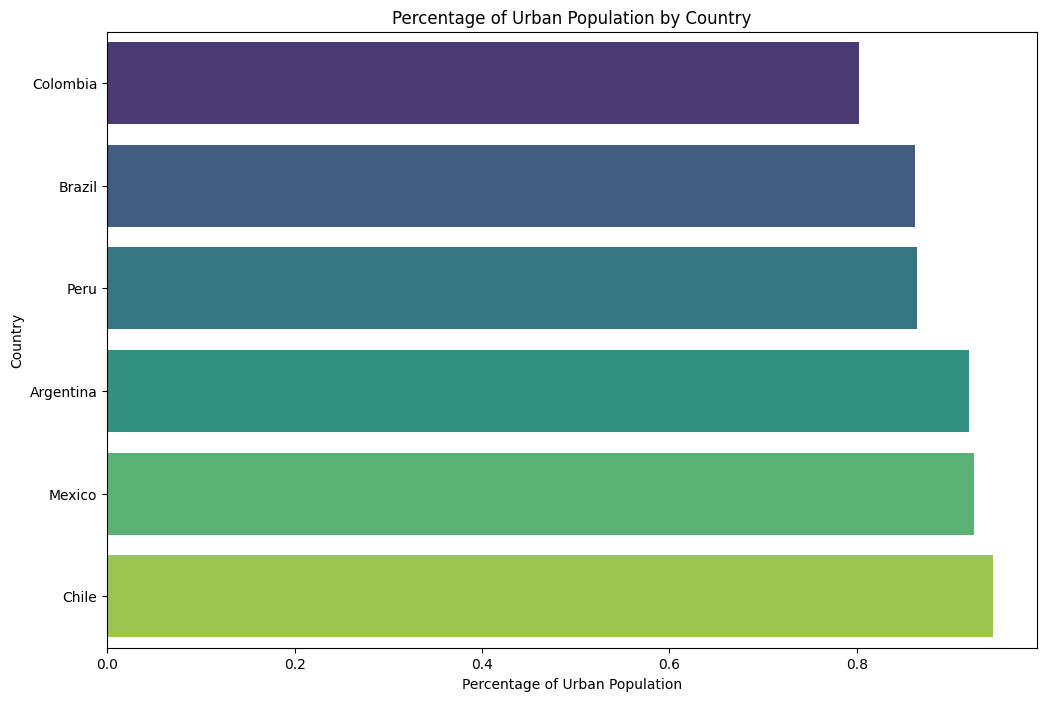

In [10]:
data_latam_countries_date['urban_population_percentage'] = data_latam_countries_date['population_urban'] / data_latam_countries_date['population']
urban_cases = data_latam_countries_date.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x= urban_cases['urban_population_percentage'], y= urban_cases.index, hue=urban_cases.index, palette='viridis')
plt.xlabel('Percentage of Urban Population')
plt.ylabel('Country')
plt.title('Percentage of Urban Population by Country')
plt.show()


##### Debido a la alta densidad poblacional urbana, Chile muestra que fue altamente impactado en la pandemia debido a esto a pesar de tener una población mucho menor a paises como Brasil o Mexico

#### Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19

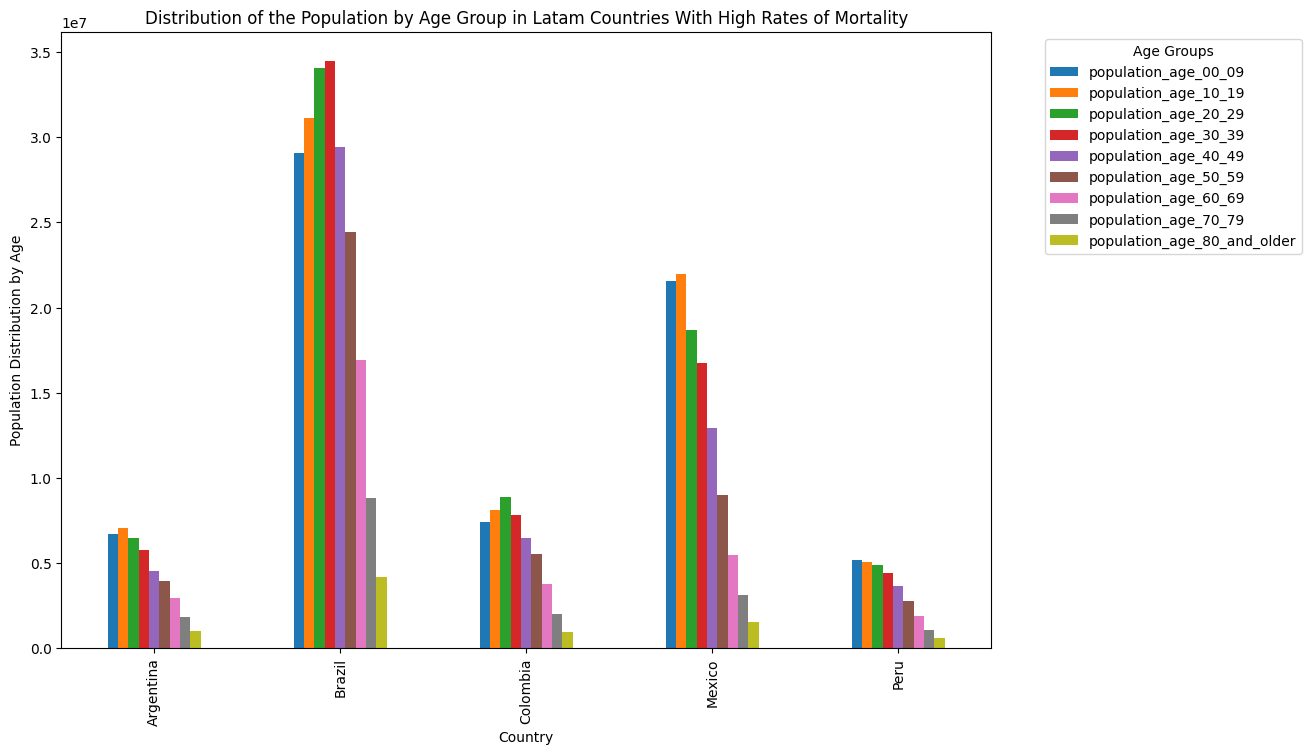

In [14]:
high_mortality_countries = data_latam_countries_date.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latam_countries_date[data_latam_countries_date['country_name'].isin(high_mortality_countries)].groupby(['country_name'])[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Country')
plt.ylabel('Population Distribution by Age')
plt.title('Distribution of the Population by Age Group in Latam Countries With High Rates of Mortality')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Age Groups')
plt.show()

##### En Brasil y Colombia la población de adultos jovenes se vio mucho más afectada, similarmente, la población infantil en Mexico y Perú también sufrió unas alzas en tasa de mortalidad

#### Comparación de Estrategias de Vacunación en América Latina


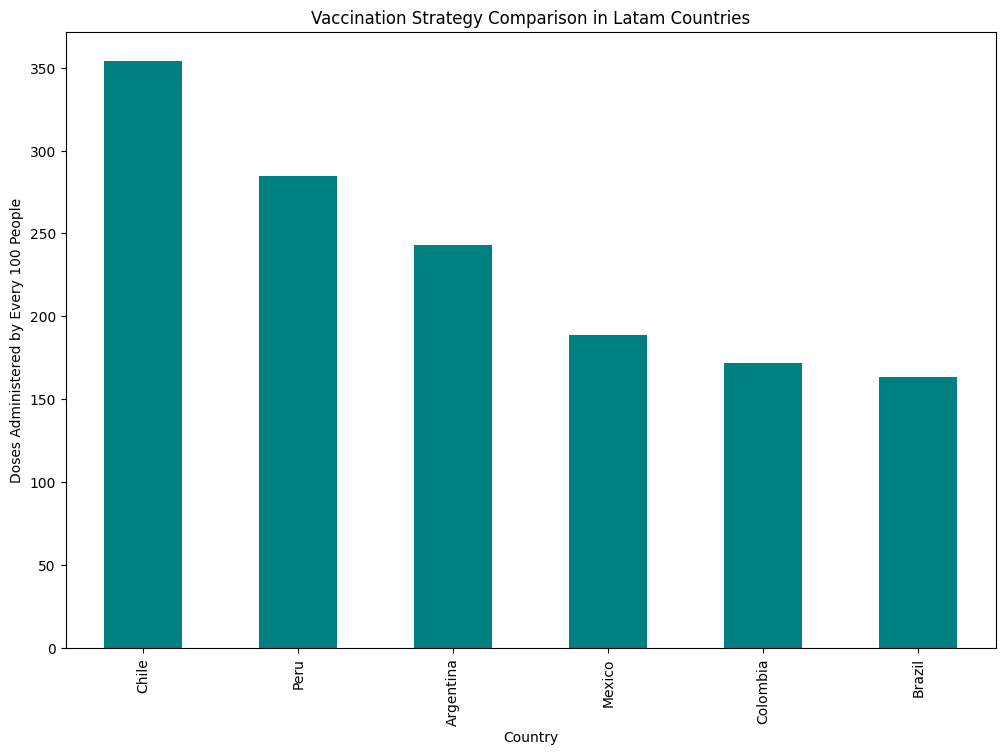

In [15]:
vaccination_strategy = data_latam_countries_date.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latam_countries_date.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color= 'teal')
plt.xlabel('Country')
plt.ylabel('Doses Administered by Every 100 People')
plt.title('Vaccination Strategy Comparison in Latam Countries')
plt.show()

##### Se pueden ver los resultados de las politicas públicas efectivas de Chile y la mala administración en Brasil

In [16]:
data_latam_countries_date.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [17]:
data_latam_countries_date.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

#### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19

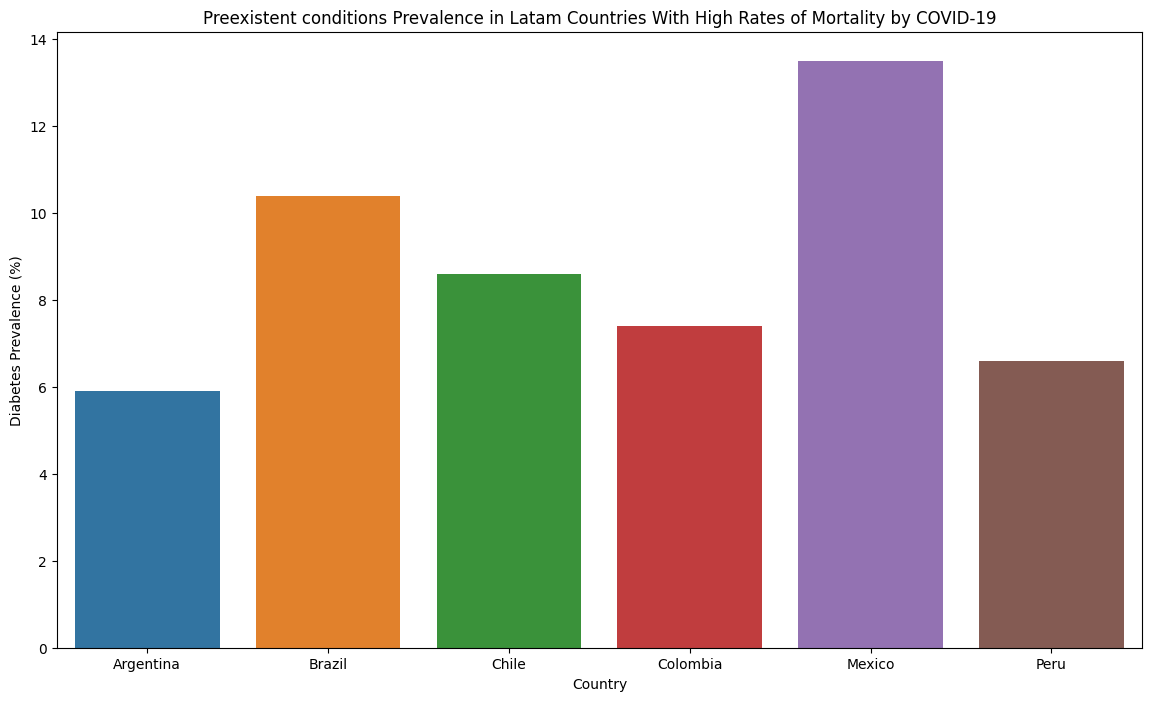

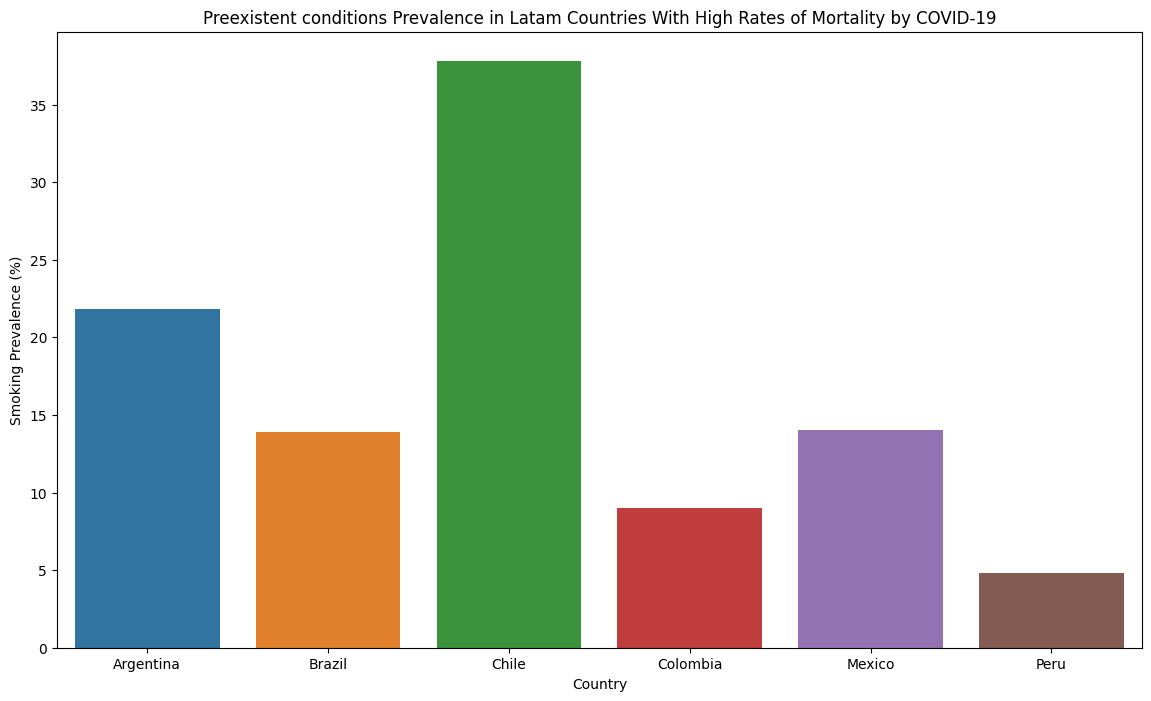

In [18]:
# Diabetes Prevalence
top_countries = data_latam_countries_date.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latam_countries_date.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = data_latam_countries_date[data_latam_countries_date['country_name'].isin (top_countries.union(bottom_countries))]

plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Country')
plt.ylabel('Diabetes Prevalence (%)')
plt.title('Preexistent conditions Prevalence in Latam Countries With High Rates of Mortality by COVID-19')
plt.show()

# Smoking Prevalence
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Country')
plt.ylabel('Smoking Prevalence (%)')
plt.title('Preexistent conditions Prevalence in Latam Countries With High Rates of Mortality by COVID-19')
plt.show()

##### Mexico y Brasil son los más afectados en la comorbilidad entre Diabetes y COVID-19 y con respecto a fumar Chile y Argentina encabezan el porcentaje de muertes por COVID-19 relacionadas con el cigarrillo.

#### Comparación de la Tasa de Fatalidad del COVID-19 entre Países de America Latina

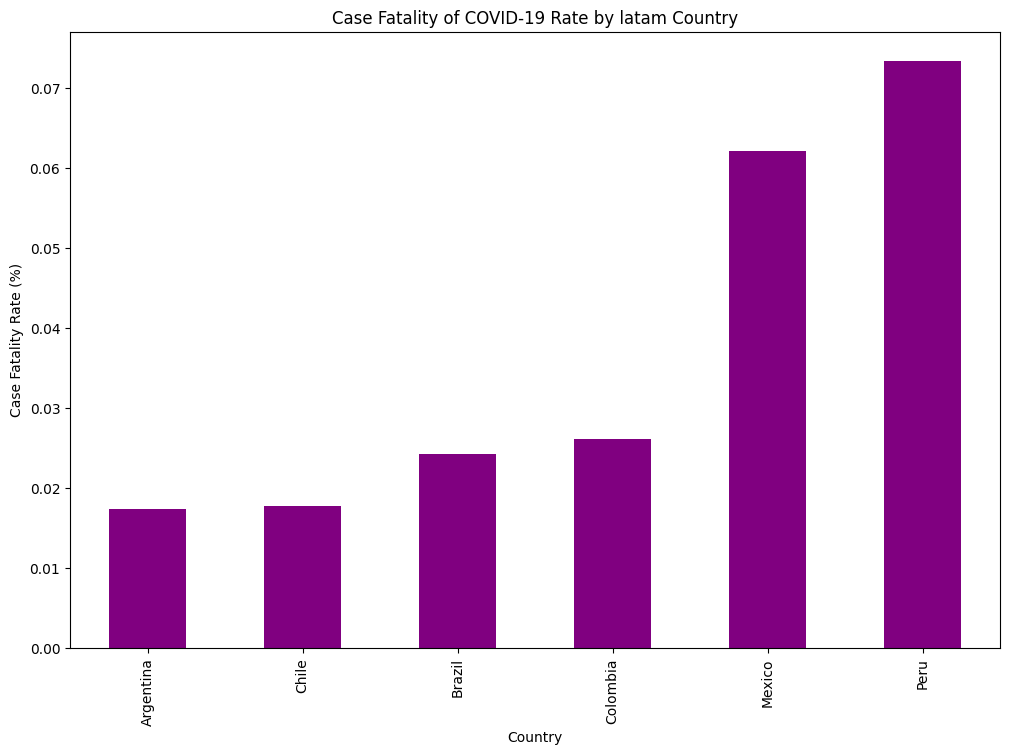

In [21]:
# Rate calculation of fatality by country
data_latam_countries_date['case_fatality_rate'] = data_latam_countries_date['cumulative_deceased'] / data_latam_countries_date['cumulative_confirmed']
fatality_rates = data_latam_countries_date.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='purple')
plt.xlabel('Country')
plt.ylabel('Case Fatality Rate (%)')
plt.title('Case Fatality of COVID-19 Rate by latam Country')
plt.show()

##### Peru y México  muestran las tasas de ftalidad más altas de latino america

#### Relación Entre la Cobertura de Vacunación y la Reducción de Casos en Latam

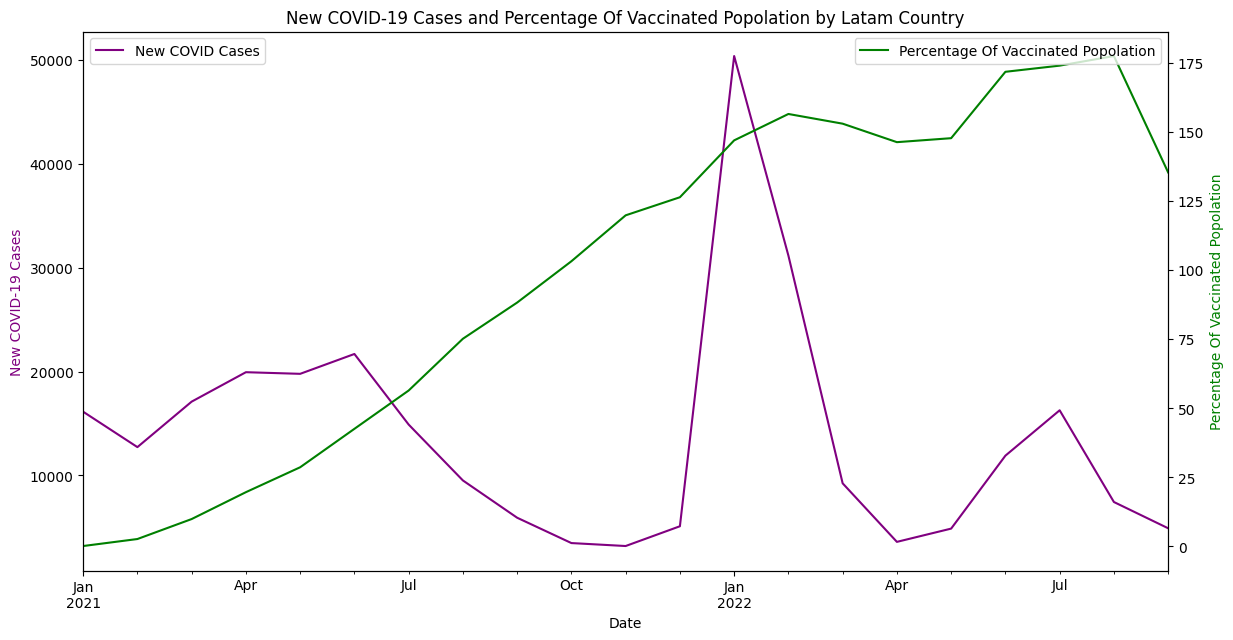

In [25]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Vaccination Percentages
data_latam_countries_date['percentage_vaccinated'] = data_latam_countries_date['cumulative_vaccine_doses_administered'] / data_latam_countries_date['population'] * 100
data_latam_countries_date.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='purple', label='New COVID Cases')
data_latam_countries_date.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Percentage Of Vaccinated Popolation')

ax1.set_xlabel('Date')
ax1.set_ylabel('New COVID-19 Cases', color='purple')
ax2.set_ylabel('Percentage Of Vaccinated Popolation', color='green')
plt.title('New COVID-19 Cases and Percentage Of Vaccinated Popolation by Latam Country')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


##### Luego de los planes de vacunación constante de los países de Latam, en Enero y Febrero de 2022 los nuevos casos de contagio bajaron drástticamente, con un pico al alza considerable en Julio del mismo año.

#### Análisis Temporal de Mortalidad por COVID-19 en Latam

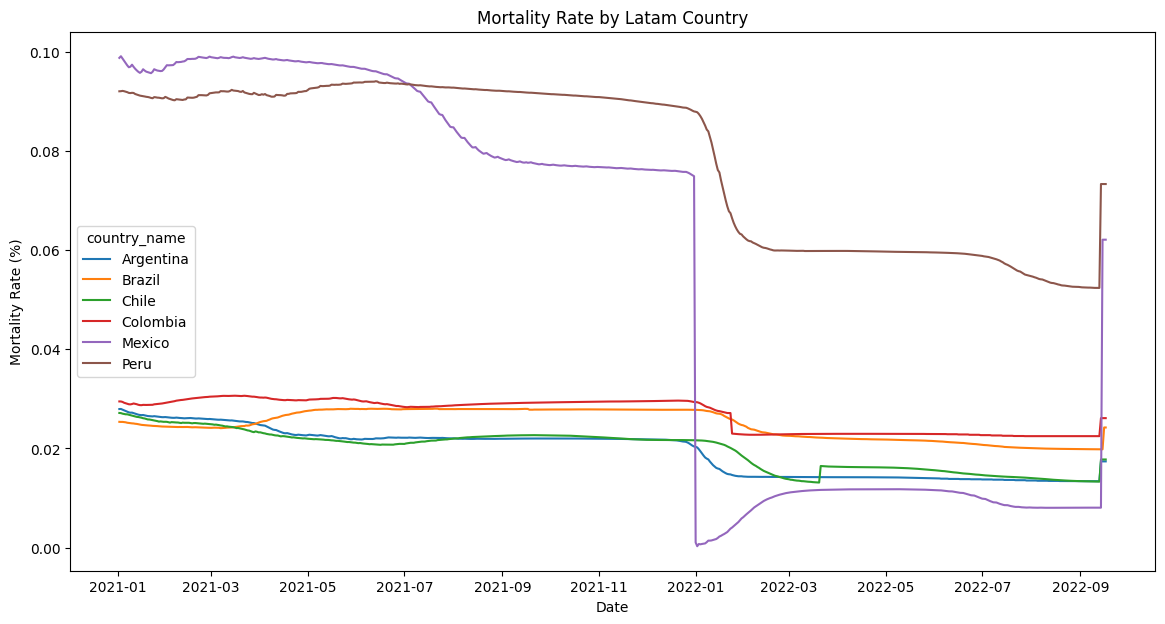

In [29]:
data_latam_countries_date['mortality_rate'] = data_latam_countries_date['cumulative_deceased'] / data_latam_countries_date['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latam_countries_date, x='date', y='mortality_rate', estimator='mean', hue='country_name')
plt.title('Mortality Rate by Latam Country')
plt.xlabel('Date')
plt.ylabel('Mortality Rate (%)')
plt.show()

##### La mortalidad en Mexico baja drásticamente debido a las politicas de vacunación de los paises. La Tasa de Perú baja también en Febrero pero se mantiene alta en relación a otros países.

#### Evolución de Casos Activos vs. Recuperados en Latam


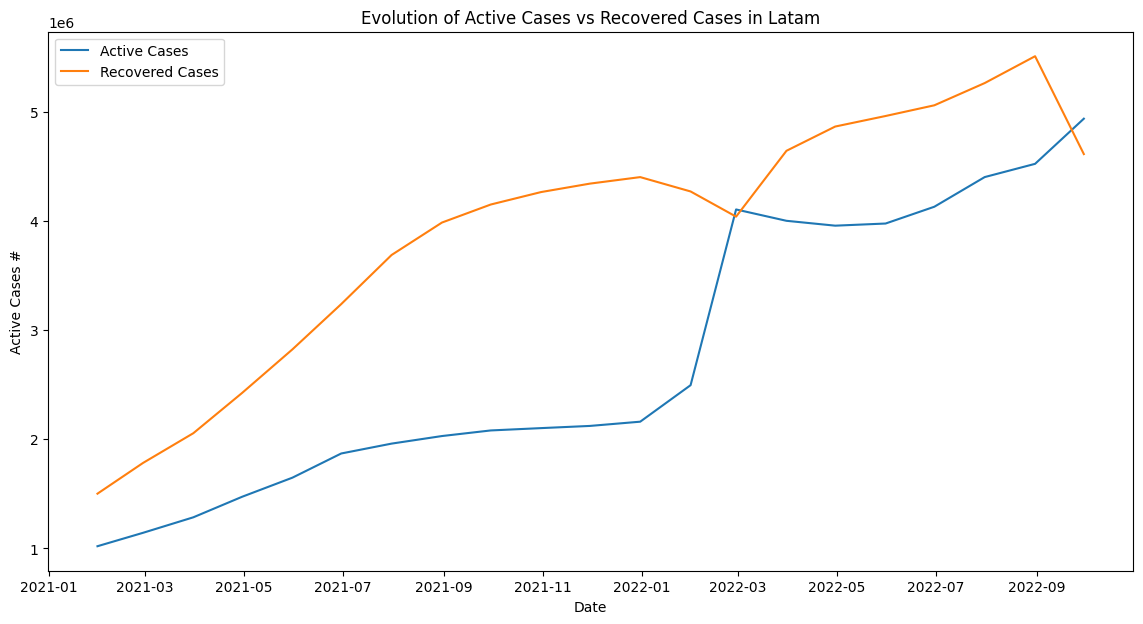

In [30]:
data_latam_countries_date['active_cases'] = data_latam_countries_date['cumulative_confirmed'] - data_latam_countries_date['cumulative_deceased'] - data_latam_countries_date['cumulative_recovered']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latam_countries_date.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Active Cases')
sns.lineplot(data=data_latam_countries_date.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Recovered Cases')
plt.title('Evolution of Active Cases vs Recovered Cases in Latam')
plt.xlabel('Date')
plt.ylabel('Active Cases #')
plt.legend()
plt.show()

#### Comparación de la Situación Actual del COVID-19 en Latam (Contexto de los datos)


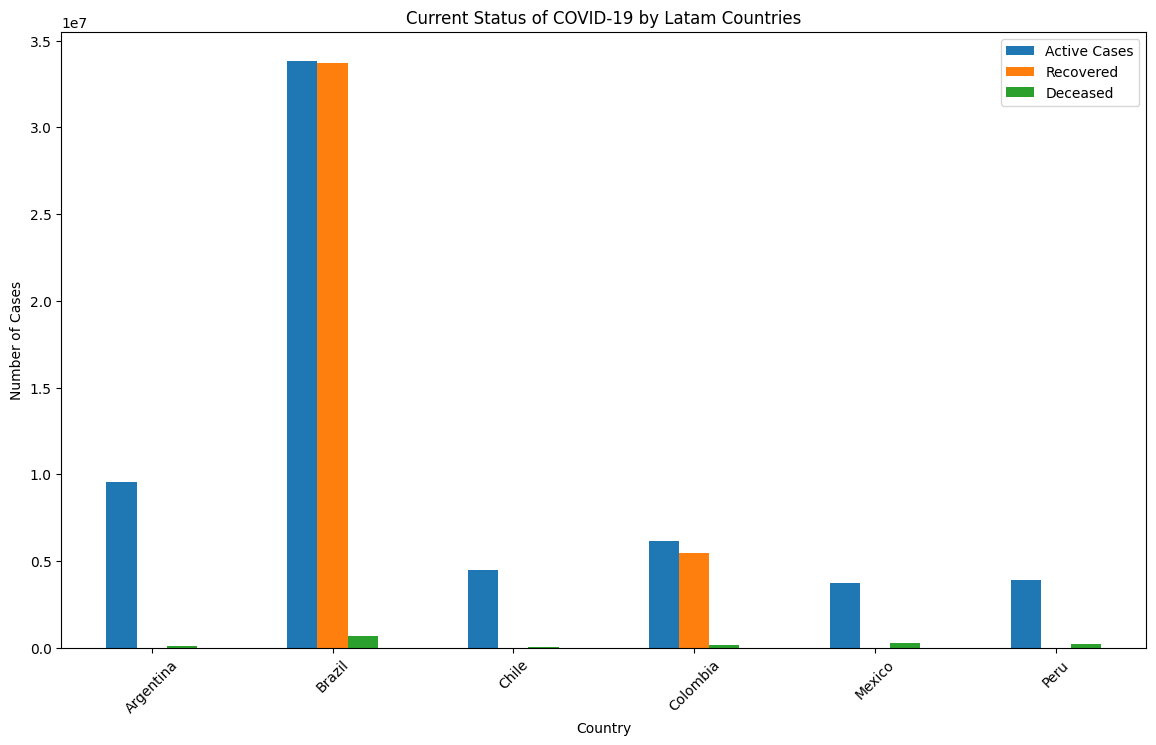

In [32]:
#Current Status
current_status = data_latam_countries_date.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
current_status.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Current Status of COVID-19 by Latam Countries')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.legend(['Active Cases', 'Recovered', 'Deceased'])
plt.xticks(rotation=45)
plt.show()

##### Los países donde BIOGENESYS debería considerar montar sus expanciones en Latinoamerica son Brasil, México y Colombia, Ya que son los países con más casos y muertes confirmadas. Adicional han sido los que menos vacunas han administrado con relación al tamaño de su población. sin tener en cuenta el panorama geo-politico de estos tres países.

#### Extra Credit

##### Gráfica del contexto de Vacunas Administradas, los casos confirmados, muertes y recuperados.

In [34]:
import folium
from folium.plugins import HeatMap

columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latam_countries_date[columns].dropna()

# Create Map for Central Point in Latin America
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Heatmap for cumulative confirmed cases
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Heatmap for cumulative deceased cases
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_confirmed)

# Heatmap for cumulative vaccine doses administered
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_confirmed)

# Heatmap for cumulative_recovered cases
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_confirmed)

map.save('map.html')

map


### Avance 4
### Dasboard en Power BI

In [ ]:
# DataFrame Clean Data Load

#data_latam_countries_date = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

In [ ]:
#import pyodbc